In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
# !pip3 install missingno
import missingno as msn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable
# !pip3 install imblearn
# from imblearn.over_sampling import SMOTE
from scipy.stats import skew
from sklearn.utils import resample

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
wine = pd.read_csv('QualityPrediction.csv')

In [9]:
wine.shape

(1599, 12)

In [10]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [13]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Checking for Null values

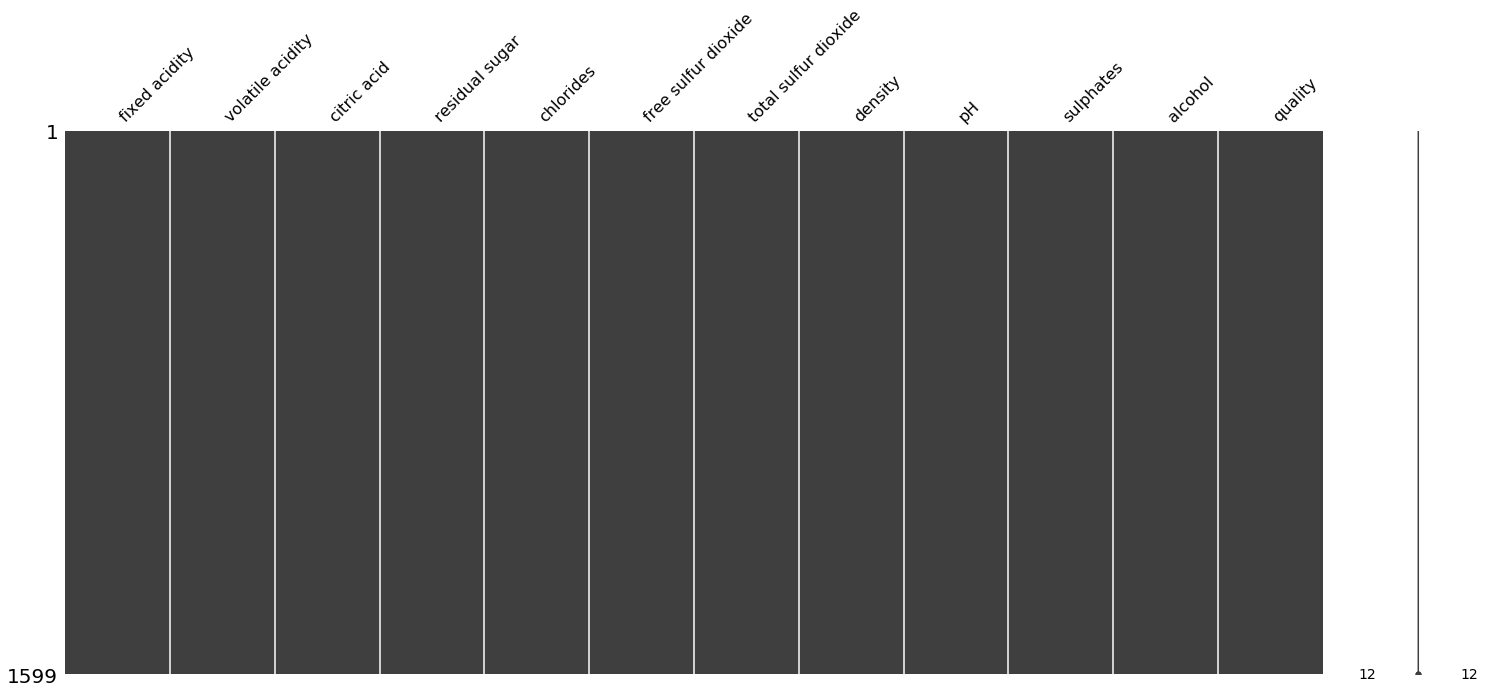

In [14]:
msn.matrix(wine)

- No null values in the dataset

In [15]:
#just checking the general way!
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

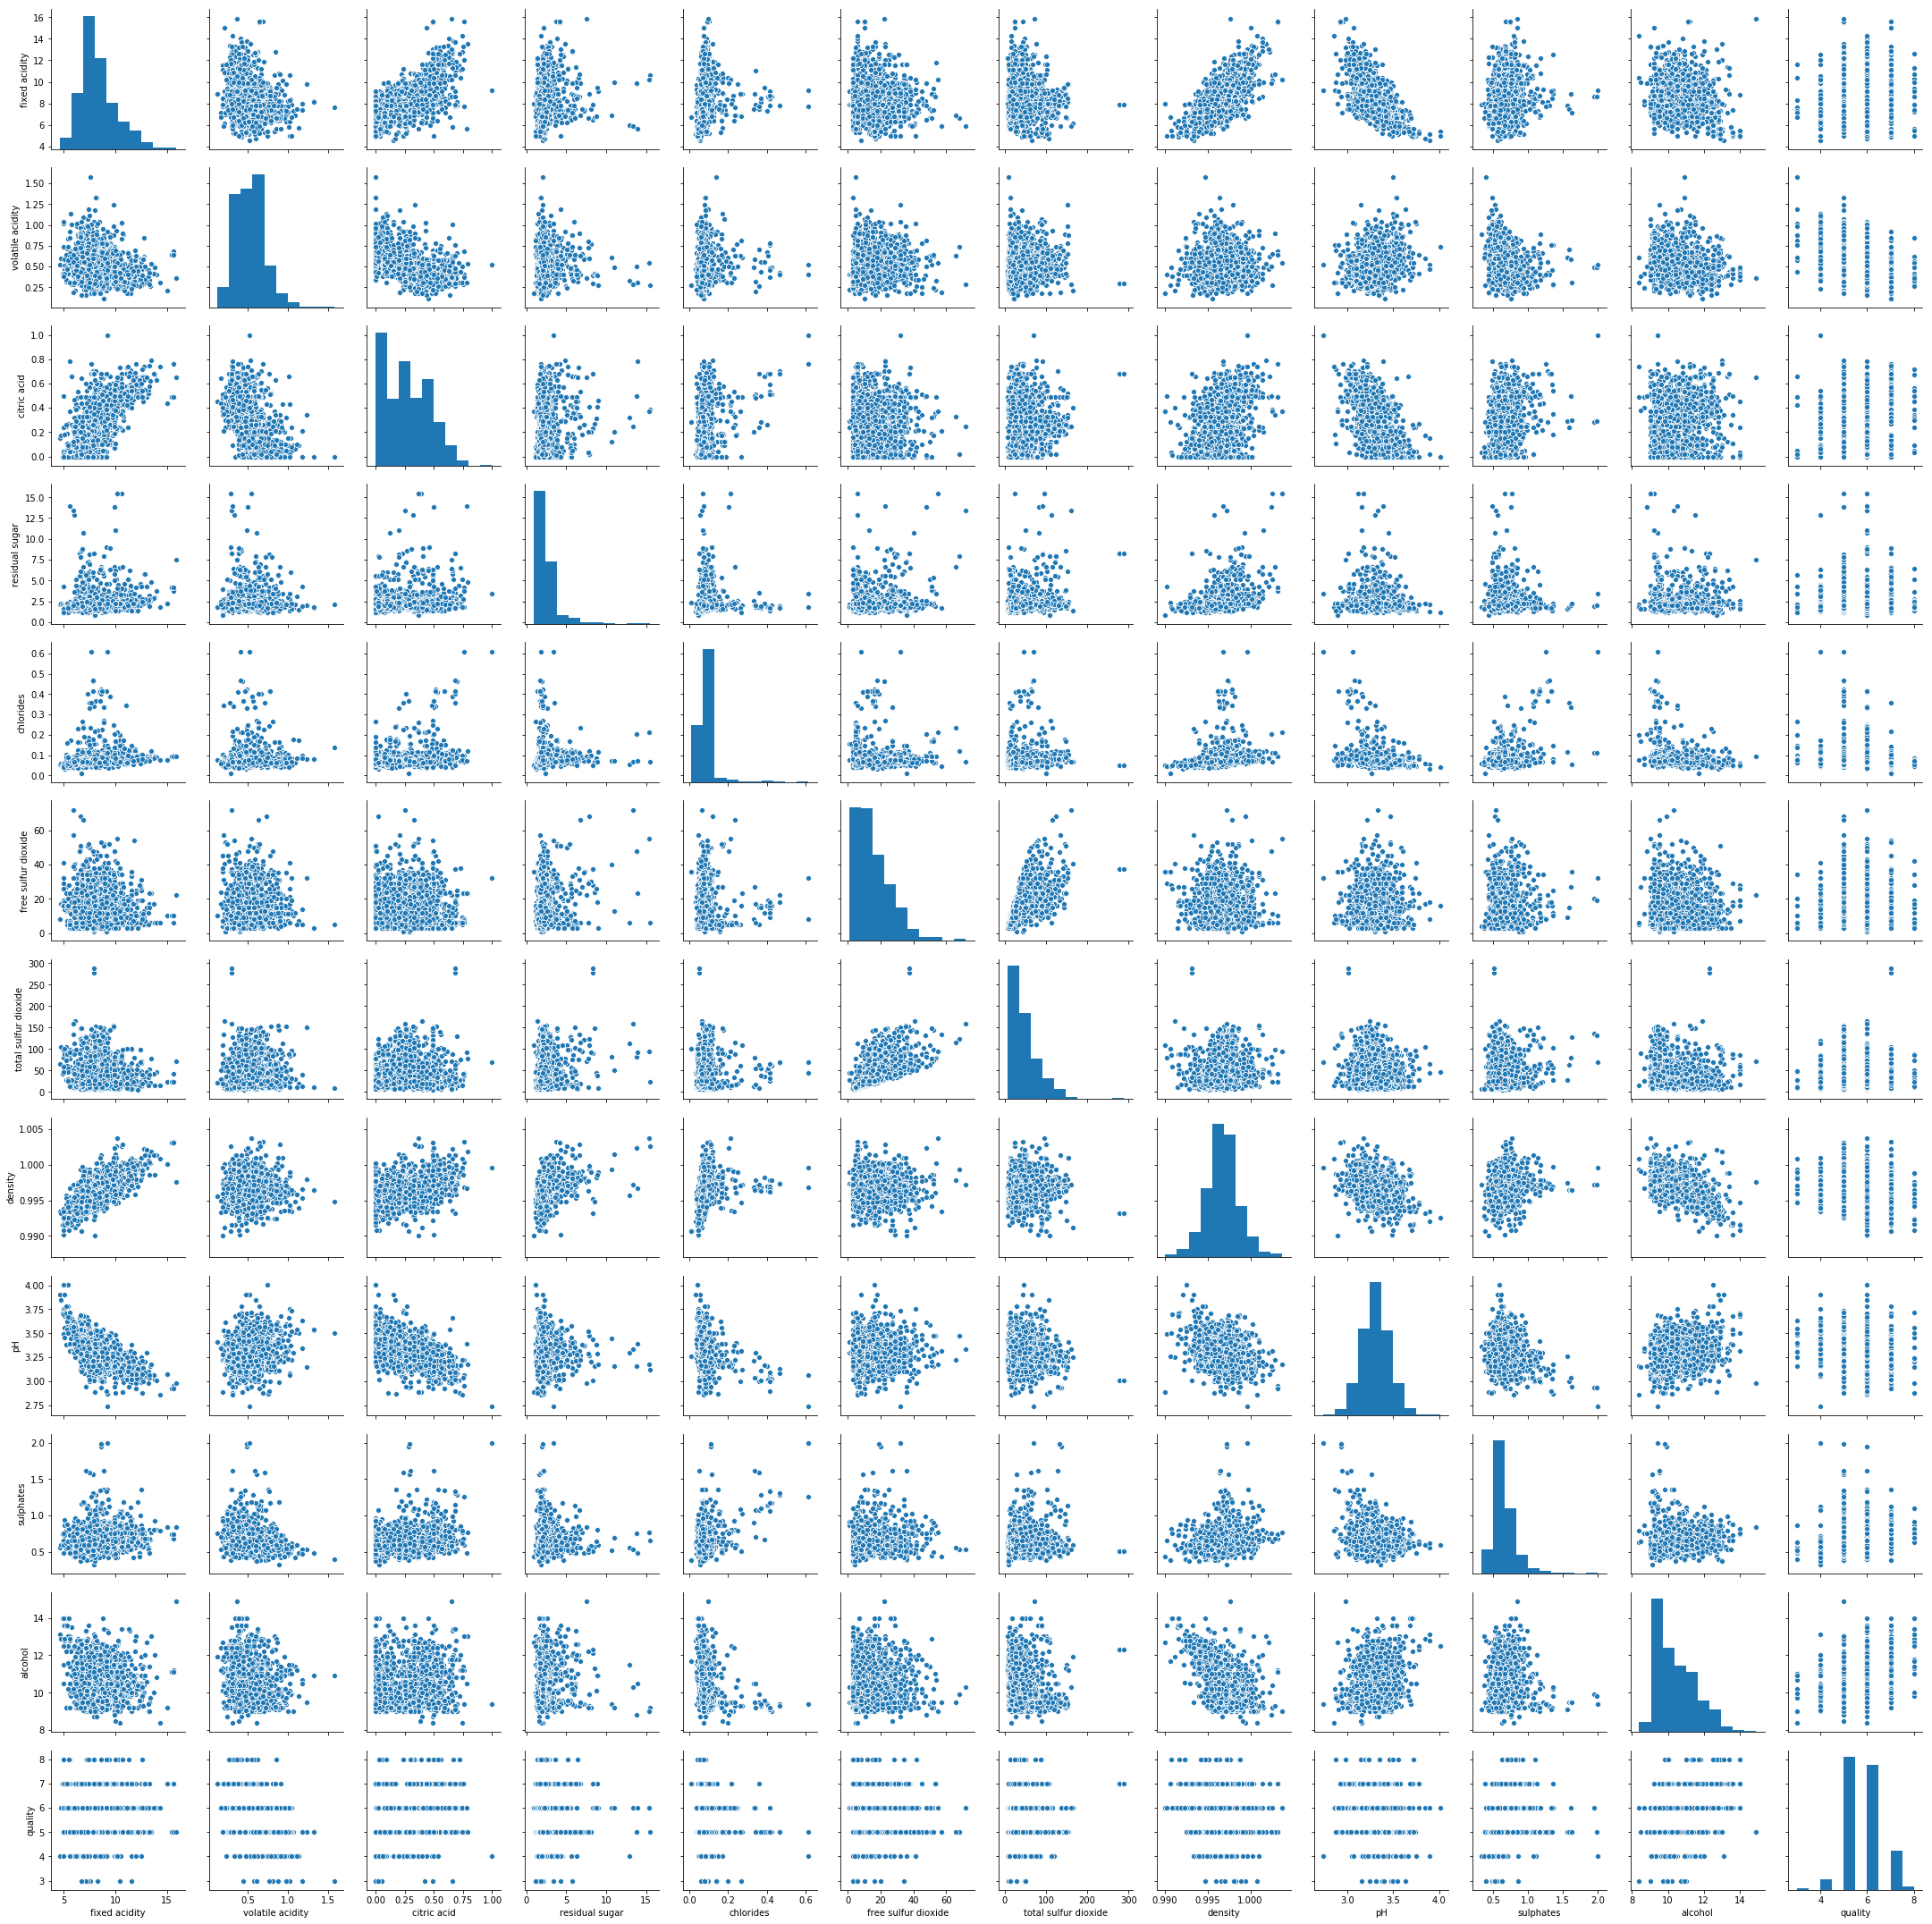

In [16]:
sns.pairplot(wine)

## Checking for Correlation

In [17]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

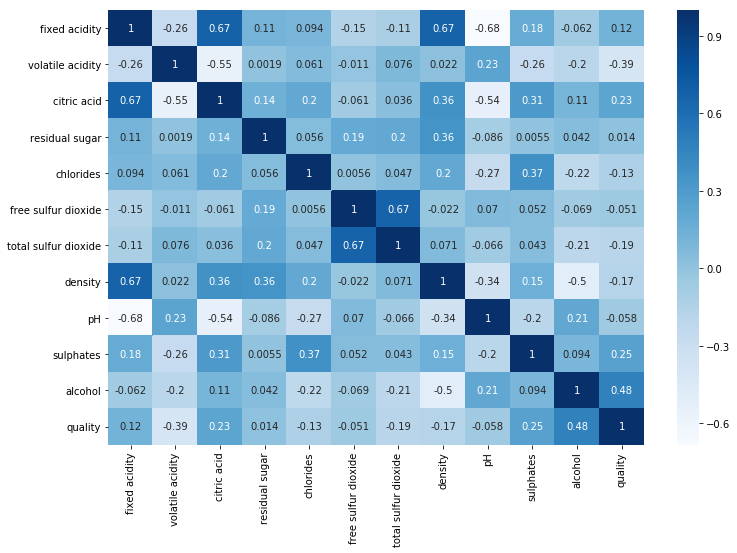

In [18]:
fig, ax = plt.subplots(figsize=(12,8))  
sns.heatmap(wine.corr(),annot=True,ax=ax, cmap='Blues')
plt.show()

-  In the above heatmap we can see that no value is greater than 0.70, hence we we conclude that there is no high correlation between any two features.

In [19]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [20]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

### Converting the problem into Classification problem

In [21]:
wine.quality = ['good' if x>=7 else 'bad' for x in wine.quality]

In [22]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad

In [23]:
wine.quality.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

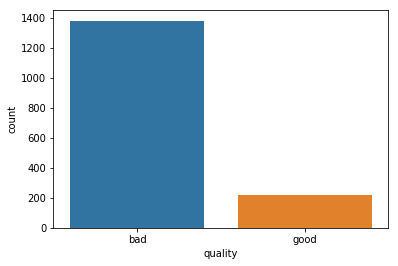

In [24]:
sns.countplot(wine.quality)

- This looks imbalanced but before re-sampling it let us check it with this data.

## Checking for outliers

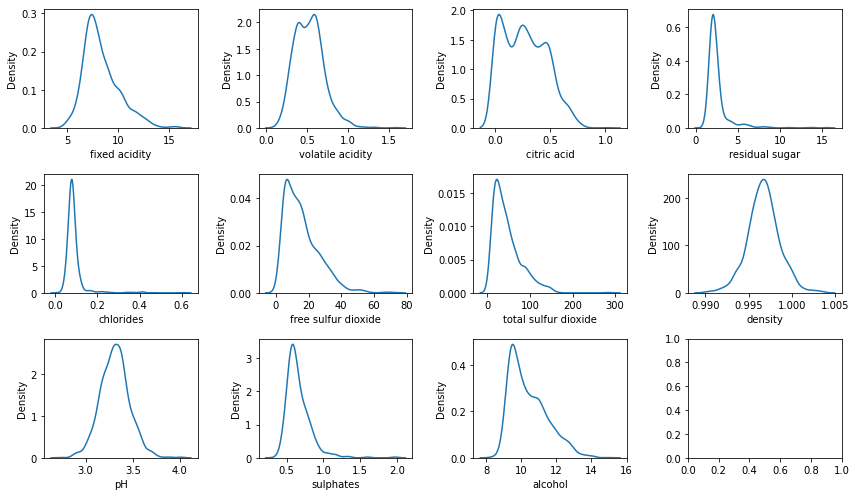

In [1523]:
kde_plot_skew(wine)

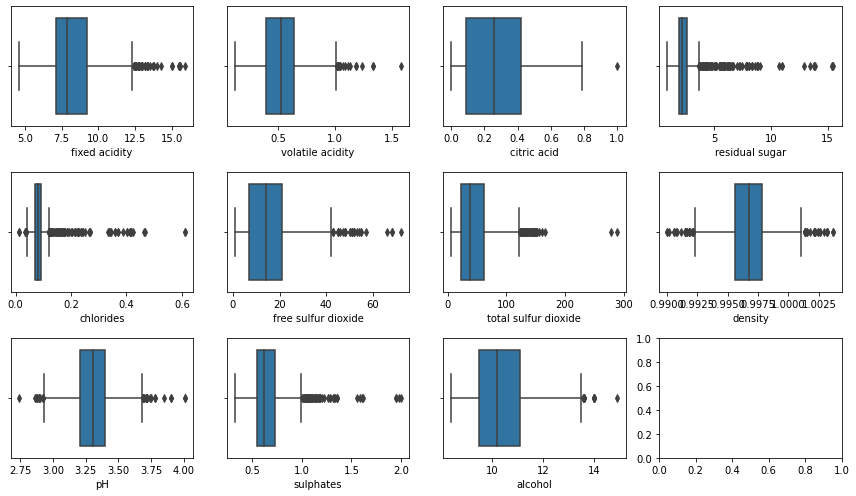

In [1524]:
box_plots(wine)

In [1525]:
outlier_detection(wine)

The shape before removing outliers is- (1599, 12)
The shape after removing outliers is- (1480, 12)


In [33]:
outlier_detection(wine)

The shape before removing outliers is- (1599, 12)
The shape after removing outliers is- (1480, 12)


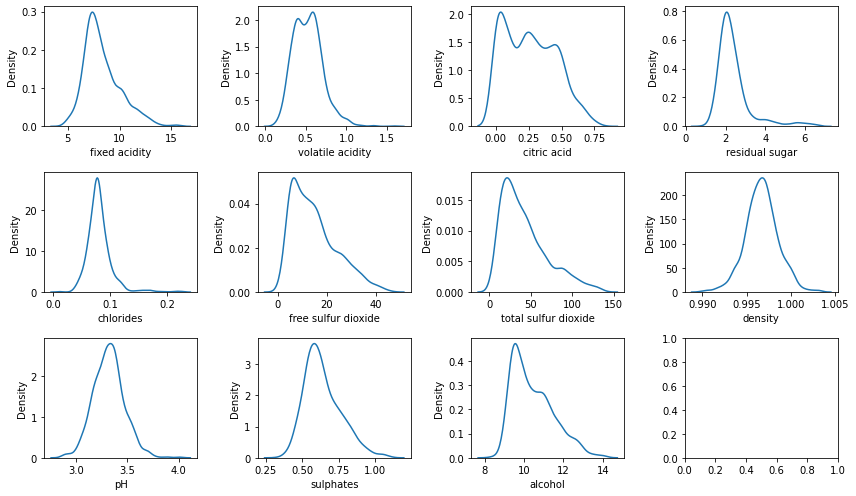

In [1526]:
kde_plot_skew(wine)

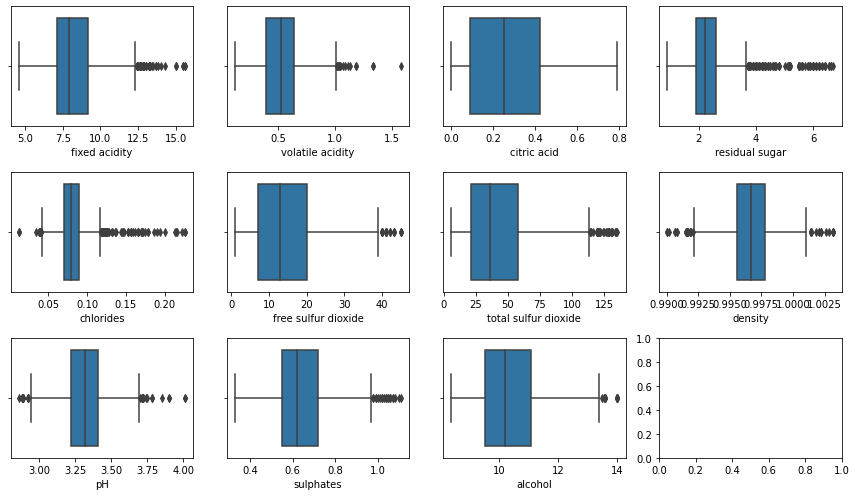

In [1527]:
box_plots(wine)

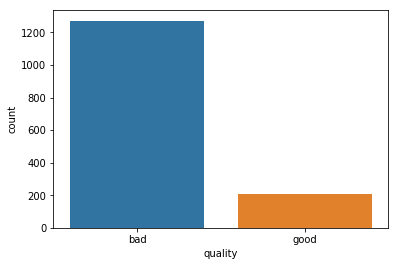

In [35]:
sns.countplot(wine.quality)

## Encoding the target variable

In [36]:
lb_enc = LabelEncoder()
wine.quality = lb_enc.fit_transform(wine.quality)

In [37]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

In [38]:
wine.quality.unique()

array([0, 1])

## Separating the Independent and Dependent varaibles

In [39]:
X = wine.drop(columns='quality', axis=1)

Y = wine.quality

In [40]:
print(X.shape)
print(Y.shape)

(1480, 11)
(1480,)


## Splitting the data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1110, 11)
(1110,)
(370, 11)
(370,)


## Standardization of feature Variables

In [42]:
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.transform(x_test)

## Building Models

# 1. Logisitic Regression

In [1536]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train_std, y_train)

LogisticRegression(random_state=0)

## Evaluation Metrics


In [1537]:
y_train_pred_log_reg = log_reg.predict(x_train_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train, y_train_pred_log_reg)}")
y_test_pred_log_reg = log_reg.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_log_reg)}")

Train Accuracy - 0.8837837837837837
Test Accuracy - 0.8810810810810811


### ROC-Curve

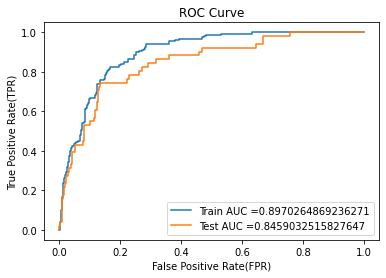

In [1538]:
y_test_pred = log_reg.predict_proba(x_test_std)[:,1]
y_train_pred = log_reg.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

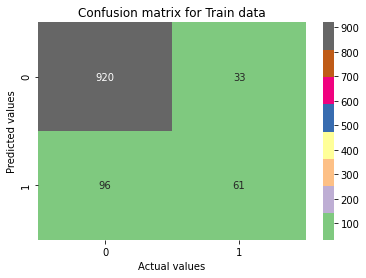

In [1539]:
cmt = metrics.confusion_matrix(y_train, y_train_pred_log_reg)
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

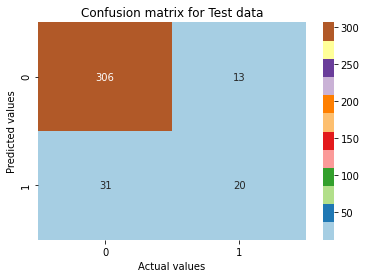

In [1540]:

cmt = metrics.confusion_matrix(y_test, y_test_pred_log_reg)
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [1541]:
print(metrics.classification_report(y_test, y_test_pred_log_reg))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.61      0.39      0.48        51

    accuracy                           0.88       370
   macro avg       0.76      0.68      0.70       370
weighted avg       0.87      0.88      0.87       370



## 2. Logistic Regression + GridSearchCV

In [1542]:
grid={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("Best Hyper-parameters after GridSearchCv are - ",logreg_cv.best_params_)

Best Hyper-parameters after GridSearchCv are -  {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}


In [1545]:
log_reg2=LogisticRegression(C=0.615848211066026,penalty="l1",solver='liblinear',random_state=0)
log_reg2.fit(x_train_std,y_train)

LogisticRegression(C=0.615848211066026, penalty='l1', random_state=0,
                   solver='liblinear')

## Evaluation Metrics

In [1547]:
y_train_pred_log_reg2 = log_reg2.predict(x_train_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train, y_train_pred_log_reg2)}")
y_test_pred_log_reg2 = log_reg2.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_log_reg2)}")

Train Accuracy - 0.8837837837837837
Test Accuracy - 0.8837837837837837


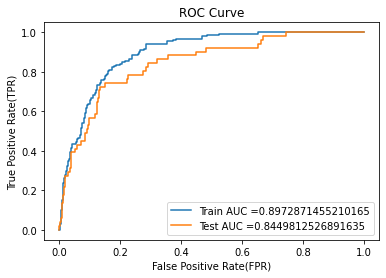

In [1548]:
y_test_pred = log_reg2.predict_proba(x_test_std)[:,1]
y_train_pred = log_reg2.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


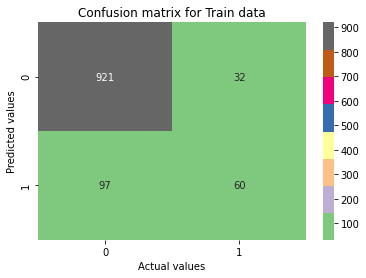

In [1549]:
cmt = metrics.confusion_matrix(y_train, log_reg2.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

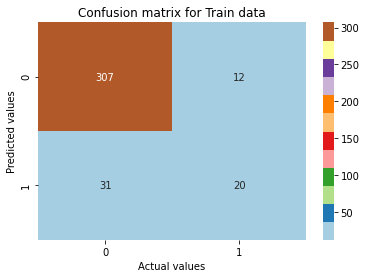

In [1550]:
cmt = metrics.confusion_matrix(y_test, log_reg2.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1551]:
print(metrics.classification_report(y_test, y_test_pred_log_reg2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.62      0.39      0.48        51

    accuracy                           0.88       370
   macro avg       0.77      0.68      0.71       370
weighted avg       0.87      0.88      0.87       370



## 3. K-NeighrestNeighbors(KNN)

In [1552]:
knn = KNeighborsClassifier()
knn.fit(x_train_std, y_train)

KNeighborsClassifier()

## Evaluation Metrics
### ROC-Curve

In [1553]:
y_train_pred_knn = knn.predict(x_train_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train, y_train_pred_knn)}")
y_test_pred_knn = knn.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_knn)}")

Train Accuracy - 0.9045045045045045
Test Accuracy - 0.8702702702702703


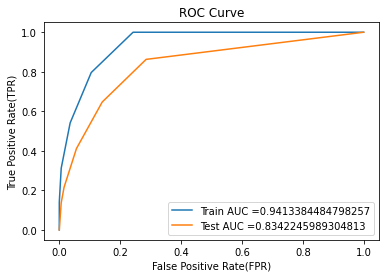

In [1554]:
y_test_pred = knn.predict_proba(x_test_std)[:,1]
y_train_pred = knn.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

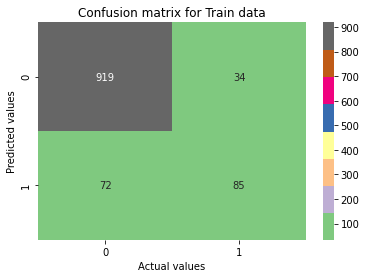

In [1555]:
cmt = metrics.confusion_matrix(y_train, y_train_pred_knn)
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

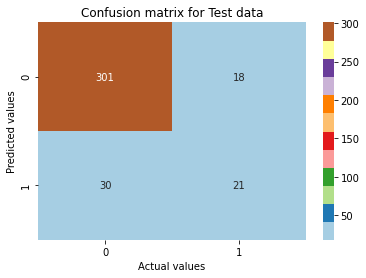

In [1556]:
cmt = metrics.confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [1557]:
print(metrics.classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       319
           1       0.54      0.41      0.47        51

    accuracy                           0.87       370
   macro avg       0.72      0.68      0.70       370
weighted avg       0.86      0.87      0.86       370



## 4.KNN with GridSearchCV

In [1558]:
params = {
    'n_neighbors' :[3,5,7,9,11],
    'metric' : ['euclidean','manhattan']
}
kn = KNeighborsClassifier()
grid_knn = GridSearchCV(kn,params, cv=10)
grid_knn.fit(x_train_std, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [1572]:
print('Best Hyper-parameters after GridSearchCV - ',grid_knn.best_params_)

Best Hyper-parameters after GridSearchCV -  {'metric': 'manhattan', 'n_neighbors': 5}


In [1575]:
model_knn = KNeighborsClassifier(n_neighbors=2,metric='manhattan')
model_knn.fit(x_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

## Evaluation Metrics


In [1576]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, model_knn.predict(x_train_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, model_knn.predict(x_test_std)))

Train Accuracy -  0.9459459459459459
Test Accuracy -  0.8972972972972973


0.8972972972972973


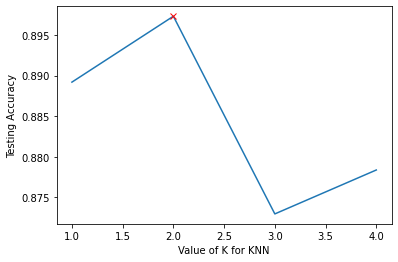

In [1577]:
k_range = range(1, 5,1)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std, y_train)
    y_pred = knn.predict(x_test_std)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print(max(scores))
    
# ----
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(k_range[scores.index(max(scores))],max(scores),'rx')

### ROC-Curve

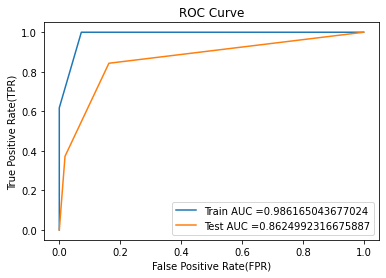

In [1579]:
y_test_pred = model_knn.predict_proba(x_test_std)[:,1]
y_train_pred = model_knn.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

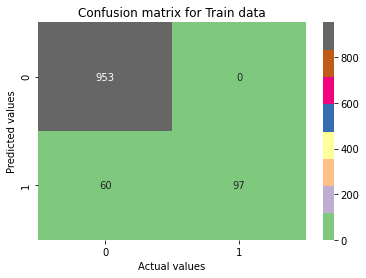

In [1580]:
cmt = metrics.confusion_matrix(y_train, model_knn.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

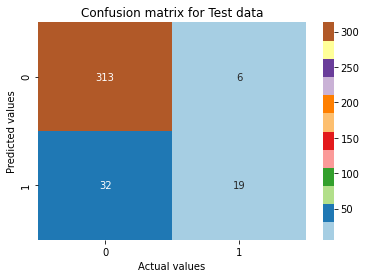

In [1581]:
cmt = metrics.confusion_matrix(y_test, model_knn.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [1582]:
print(metrics.classification_report(y_test, model_knn.predict(x_test_std)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       319
           1       0.76      0.37      0.50        51

    accuracy                           0.90       370
   macro avg       0.83      0.68      0.72       370
weighted avg       0.89      0.90      0.88       370



## 5. Decision Trees

In [1583]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

## Evaluation  Metrics

In [1584]:
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)
print('Train Accuracy - ',metrics.accuracy_score(y_train, y_train_pred_dt))
print('Test Accuracy - ',metrics.accuracy_score(y_test, y_test_pred_dt))

Train Accuracy -  1.0
Test Accuracy -  0.8783783783783784


### ROC-Curve

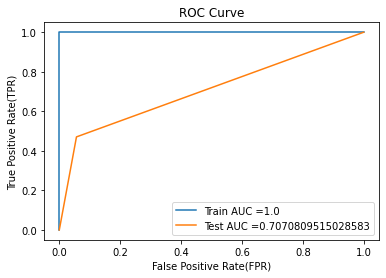

In [1585]:
y_test_pred = dt.predict_proba(x_test)[:,1]
y_train_pred = dt.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


- The Decision tree model is clearly overfitting.

## Confusion Matrix

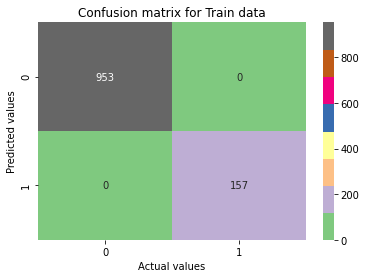

In [1586]:
cmt = metrics.confusion_matrix(y_train, dt.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

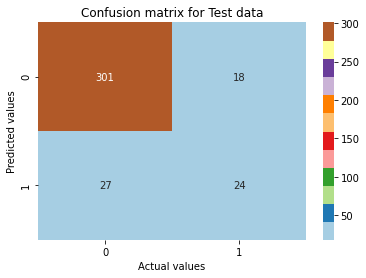

In [1587]:
cmt = metrics.confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [1588]:
print(metrics.classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       319
           1       0.57      0.47      0.52        51

    accuracy                           0.88       370
   macro avg       0.74      0.71      0.72       370
weighted avg       0.87      0.88      0.87       370



## 6. Decision Tree with GridSearchCV

In [1589]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'criterion' : ['gini','entropy']
}

model_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv=10)
model_grid.fit(x_train, y_train)
print('Best parameters after GridSearchCV are - ',model_grid.best_params_)

Best parameters after GridSearchCV are -  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}


In [1597]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=3, random_state=0)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=0)


## Evaluation Metrics


In [1598]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, model_dt.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, model_dt.predict(x_test)))

Train Accuracy -  0.8900900900900901
Test Accuracy -  0.8756756756756757


### ROC-Curve

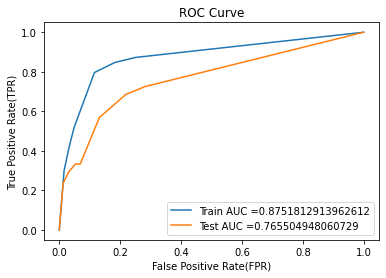

In [1599]:
y_test_pred = model_dt.predict_proba(x_test)[:,1]
y_train_pred = model_dt.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

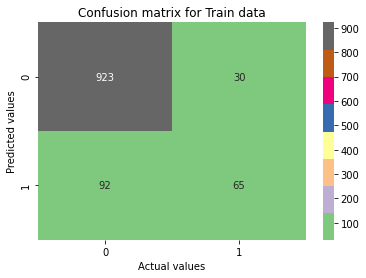

In [1600]:
cmt = metrics.confusion_matrix(y_train, model_dt.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

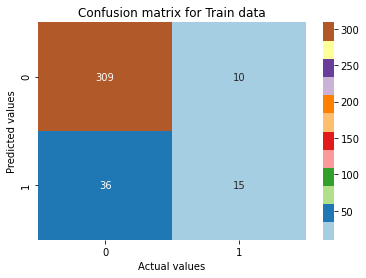

In [1601]:
cmt = metrics.confusion_matrix(y_test, model_dt.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1602]:
print(metrics.classification_report(y_test, model_dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       319
           1       0.60      0.29      0.39        51

    accuracy                           0.88       370
   macro avg       0.75      0.63      0.66       370
weighted avg       0.85      0.88      0.86       370



## 7. Random Forest

In [1603]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

## Evaluation Metrics


In [1604]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, rf.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, rf.predict(x_test)))

Train Accuracy -  1.0
Test Accuracy -  0.9108108108108108


### ROC-Curve

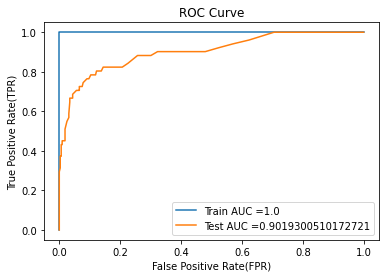

In [1605]:
y_test_pred = rf.predict_proba(x_test)[:,1]
y_train_pred = rf.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

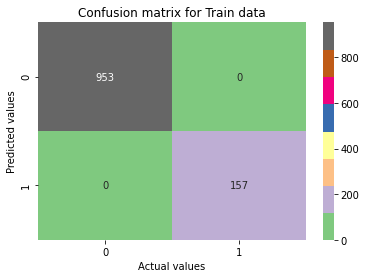

In [1606]:
cmt = metrics.confusion_matrix(y_train, rf.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

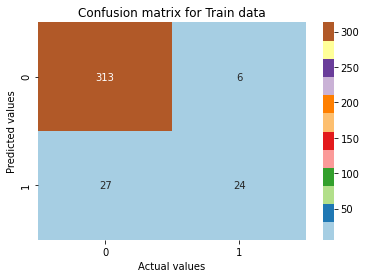

In [1607]:
cmt = metrics.confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1608]:
print(metrics.classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       319
           1       0.80      0.47      0.59        51

    accuracy                           0.91       370
   macro avg       0.86      0.73      0.77       370
weighted avg       0.90      0.91      0.90       370



## 8. Random Forest with GridSearchCV

In [1609]:
param_grid = { 
    'n_estimators': [100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=10 )
rf_grid.fit(x_train,y_train)
print('Best Hyper-parameters are - ',rf_grid.best_params_)

Best Hyper-parameters are -  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}


In [1610]:
rf_model = RandomForestClassifier(criterion='gini',n_estimators=100,max_features='log2',max_depth=8, random_state=0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', random_state=0)

## Evaluation Metrics


In [1611]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, rf_model.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, rf_model.predict(x_test)))

Train Accuracy -  0.9828828828828828
Test Accuracy -  0.9027027027027027


### ROC-Curve

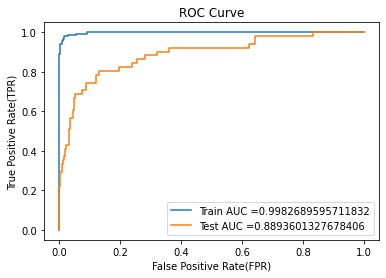

In [1612]:
y_test_pred = rf_model.predict_proba(x_test)[:,1]
y_train_pred = rf_model.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix


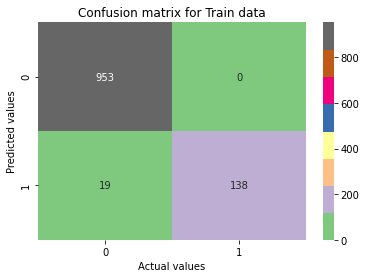

In [1613]:
cmt = metrics.confusion_matrix(y_train, rf_model.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

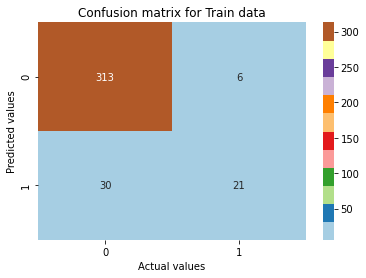

In [1614]:
cmt = metrics.confusion_matrix(y_test, rf_model.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1615]:
print(metrics.classification_report(y_test, rf_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       319
           1       0.78      0.41      0.54        51

    accuracy                           0.90       370
   macro avg       0.85      0.70      0.74       370
weighted avg       0.89      0.90      0.89       370



## 9. SVM

In [1616]:
svm = SVC(probability=True, random_state=1)
svm.fit(x_train_std, y_train)

SVC(probability=True, random_state=1)

## Evaluation Metrics


In [1617]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, svm.predict(x_train_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, svm.predict(x_test_std)))

Train Accuracy -  0.8981981981981982
Test Accuracy -  0.8918918918918919


### ROC-Curve


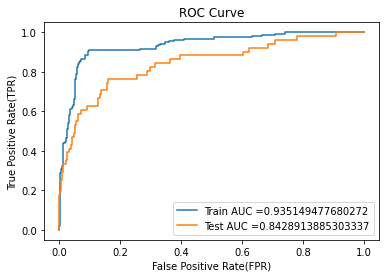

In [1618]:
y_test_pred = svm.predict_proba(x_test_std)[:,1]
y_train_pred = svm.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix


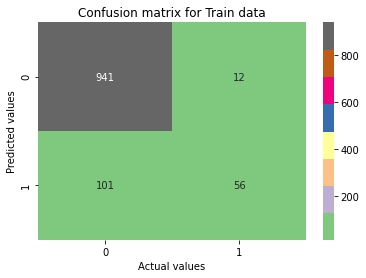

In [1619]:
cmt = metrics.confusion_matrix(y_train, svm.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

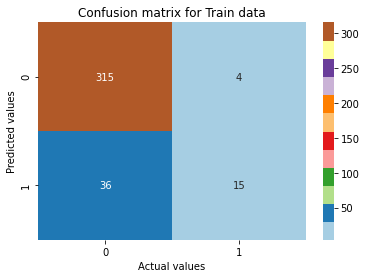

In [1620]:
cmt = metrics.confusion_matrix(y_test, svm.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1621]:
print(metrics.classification_report(y_test, svm.predict(x_test_std)))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       319
           1       0.79      0.29      0.43        51

    accuracy                           0.89       370
   macro avg       0.84      0.64      0.68       370
weighted avg       0.88      0.89      0.87       370



## 10. SVM with GridSearchCV

In [1622]:
params = {
    'C':(np.arange(0.01,1,0.01)),
    'kernel':['linear','rbf','ploy'],
    'degree':[2,3,4,5],
    'gamma':[0.01,0.02,0.03,0.04,0.05]
}

svm_grid = GridSearchCV(SVC(), param_grid=params, cv=10)
svm_grid.fit(x_train_std, y_train)
print('Best Hyper-parameters are -',svm_grid.best_params_)

Best Hyper-parameters are - {'C': 0.99, 'degree': 2, 'gamma': 0.04, 'kernel': 'rbf'}


In [1624]:
svm_model = SVC(C=0.99,kernel='rbf',degree=2,gamma=0.04,probability=True,random_state=0)
svm_model.fit(x_train_std,y_train)

SVC(C=0.99, degree=2, gamma=0.04, probability=True, random_state=0)

## Evaluation Metrics

In [1625]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, svm_model.predict(x_train_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, svm_model.predict(x_test_std)))

Train Accuracy -  0.890990990990991
Test Accuracy -  0.8864864864864865


### ROC-Curve

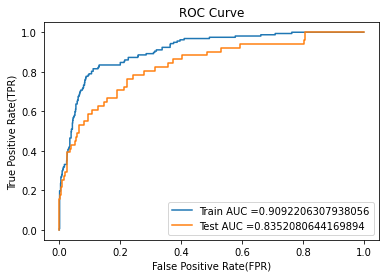

In [1626]:
y_test_pred = svm_model.predict_proba(x_test_std)[:,1]
y_train_pred = svm_model.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


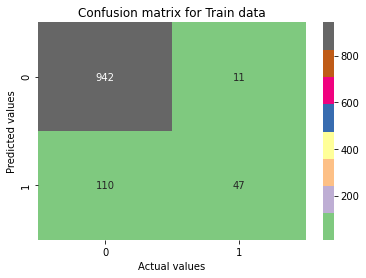

In [1627]:
cmt = metrics.confusion_matrix(y_train, svm_model.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

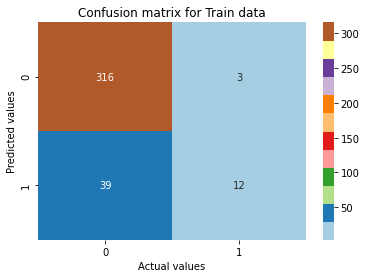

In [1628]:
cmt = metrics.confusion_matrix(y_test, svm_model.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1629]:
print(metrics.classification_report(y_test, svm_model.predict(x_test_std)))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94       319
           1       0.80      0.24      0.36        51

    accuracy                           0.89       370
   macro avg       0.85      0.61      0.65       370
weighted avg       0.88      0.89      0.86       370



## 11. AdaBoost

In [1630]:
adb = AdaBoostClassifier(random_state=0)
adb.fit(x_train, y_train)

AdaBoostClassifier(random_state=0)

## Evaluation Metrics


In [1631]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, adb.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, adb.predict(x_test)))


Train Accuracy -  0.9009009009009009
Test Accuracy -  0.8810810810810811


### ROC-Curve


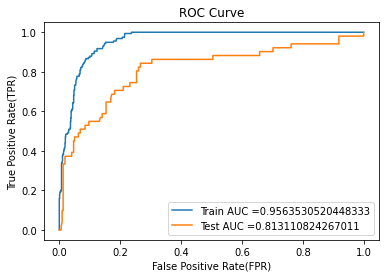

In [1632]:
y_test_pred = adb.predict_proba(x_test)[:,1]
y_train_pred = adb.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


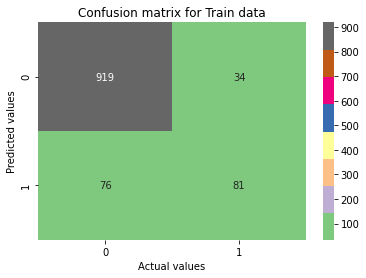

In [1633]:
cmt = metrics.confusion_matrix(y_train, adb.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

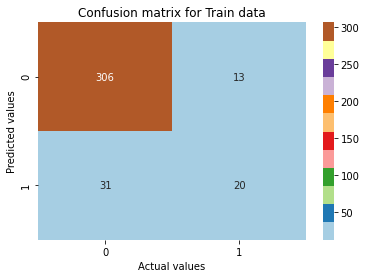

In [1634]:
cmt = metrics.confusion_matrix(y_test, adb.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1635]:
print(metrics.classification_report(y_test, adb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.61      0.39      0.48        51

    accuracy                           0.88       370
   macro avg       0.76      0.68      0.70       370
weighted avg       0.87      0.88      0.87       370



## 12. AdaBoost with GridSearchCV

In [1636]:
param_grid = {
                'n_estimators' : [10,50,100,150,200,500],
                'learning_rate' : [0.01,0.05,0.1,0.3,1],
             }

ada_grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10)
ada_grid.fit(x_train, y_train)
print('Best Hyper-parameters after GridSearchCV are - ',ada_grid.best_params_)

Best Hyper-parameters after GridSearchCV are -  {'learning_rate': 1, 'n_estimators': 500}


- As the n_estimators was giving overfitting model, after trying different values decided to consider 150.

In [1643]:
ada_model = AdaBoostClassifier(n_estimators = 150 ,learning_rate=1, random_state=0)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=150, random_state=0)

## Evaluation Metrics


In [1644]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, ada_model.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, ada_model.predict(x_test)))


Train Accuracy -  0.9477477477477477
Test Accuracy -  0.8945945945945946


### ROC-Curve


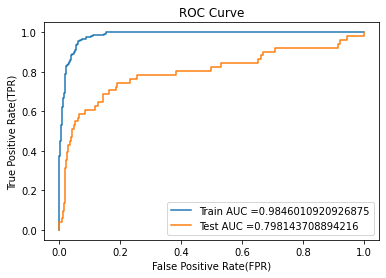

In [1646]:
y_test_pred = ada_model.predict_proba(x_test)[:,1]
y_train_pred = ada_model.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


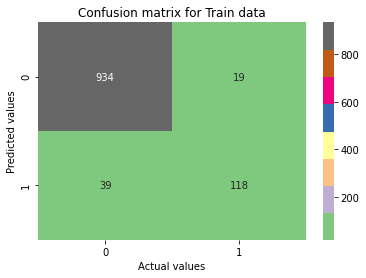

In [1647]:
cmt = metrics.confusion_matrix(y_train, ada_model.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

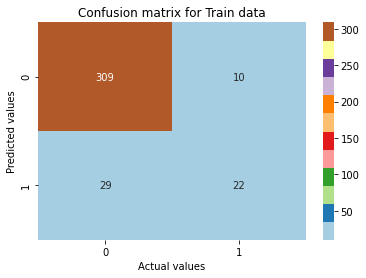

In [1648]:
cmt = metrics.confusion_matrix(y_test, ada_model.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1649]:
print(metrics.classification_report(y_test, ada_model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       319
           1       0.69      0.43      0.53        51

    accuracy                           0.89       370
   macro avg       0.80      0.70      0.74       370
weighted avg       0.88      0.89      0.88       370



#  Consolidating all the results


In [1650]:
table = PrettyTable(['S.no','Model','Train Accuracy', 'Test Accuracy'])

table.add_row(['1','Logistic Regression','88.38','88.11'])
table.add_row(['2','Logistic Regression+GridSearchCV','88.38','88.38'])
table.add_row(['3','K-NearestNeighbors','90.45','87.03'])
table.add_row(['4','K-NearestNeighbors+GridSearchCV','89.01','87.57'])
table.add_row(['5','Decision Tree','100','87.84'])
table.add_row(['6','Decision Tree+GridSearchCV','89.01','87.57'])
table.add_row(['7','Random Forest','100','91.08'])
table.add_row(['8','Random Forest+GridSearchCV','98.29','90.27'])
table.add_row(['9','SVM','89.82','89.19'])
table.add_row(['10','SVM+GridSearchCV','89.09','88.65'])
table.add_row(['11','AdaBoost','90.09','88.11'])
table.add_row(['12','AdaBoost+GridSearhCV','94.77','89.46'])
print(table)

+------+----------------------------------+----------------+---------------+
| S.no |              Model               | Train Accuracy | Test Accuracy |
+------+----------------------------------+----------------+---------------+
|  1   |       Logistic Regression        |     88.38      |     88.11     |
|  2   | Logistic Regression+GridSearchCV |     88.38      |     88.38     |
|  3   |        K-NearestNeighbors        |     90.45      |     87.03     |
|  4   | K-NearestNeighbors+GridSearchCV  |     89.01      |     87.57     |
|  5   |          Decision Tree           |      100       |     87.84     |
|  6   |    Decision Tree+GridSearchCV    |     89.01      |     87.57     |
|  7   |          Random Forest           |      100       |     91.08     |
|  8   |    Random Forest+GridSearchCV    |     98.29      |     90.27     |
|  9   |               SVM                |     89.82      |     89.19     |
|  10  |         SVM+GridSearchCV         |     89.09      |     88.65     |

- ### Amongst all the models above, SVM performed better.


# Changing the constraint for good and bad quality division

In [872]:
wine_samples = pd.read_csv('QualityPrediction.csv')

In [873]:
wine_samples.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [874]:
wine_samples.quality = ['good' if x>=6 else 'bad' for x in wine_samples.quality]

In [875]:
wine_samples.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [30]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [877]:
wine_samples.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Outlier Removal

In [26]:
def outlier_detection(df):
    print('The shape before removing outliers is-',df.shape)
    for col in cols:
        if skew(df[col]) > 1 or skew(df[col]) < -1:
            mean = np.mean(df[col])
            std = np.std(df[col])
            for i in df[col]:
                z = (i-mean)/std
                if z > 3 or z < -3:
                    df.drop(df[df[col] == i].index, axis=0,inplace=True)
    print('The shape after removing outliers is-',df.shape)

In [27]:
def kde_plot_skew(df):
    i=0
    fg, ax = plt.subplots(3,4,figsize=(12,7))
    ax = ax.flatten()
    for col in cols: 
        sns.kdeplot(data=df, x= df[col],ax=ax[i])
        plt.tight_layout()
        i += 1
    fg.savefig('kdeplots_all.png')
    

In [28]:
def box_plots(df):
    i=0
    fg, ax = plt.subplots(3,4,figsize=(12,7))
    ax = ax.flatten()
    for col in cols: 
        sns.boxplot(data=df, x= df[col],ax=ax[i])
        plt.tight_layout()
        i += 1
    fg.savefig('boxplots_all.png')

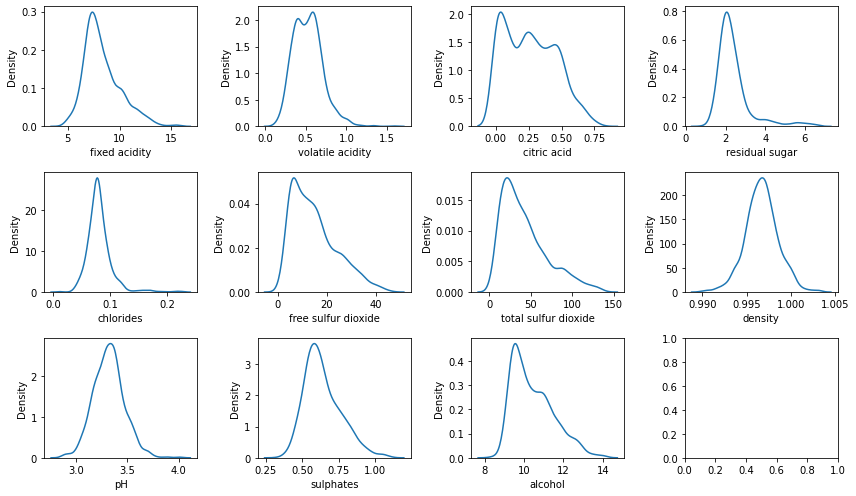

In [890]:
kde_plot_skew(wine_samples)

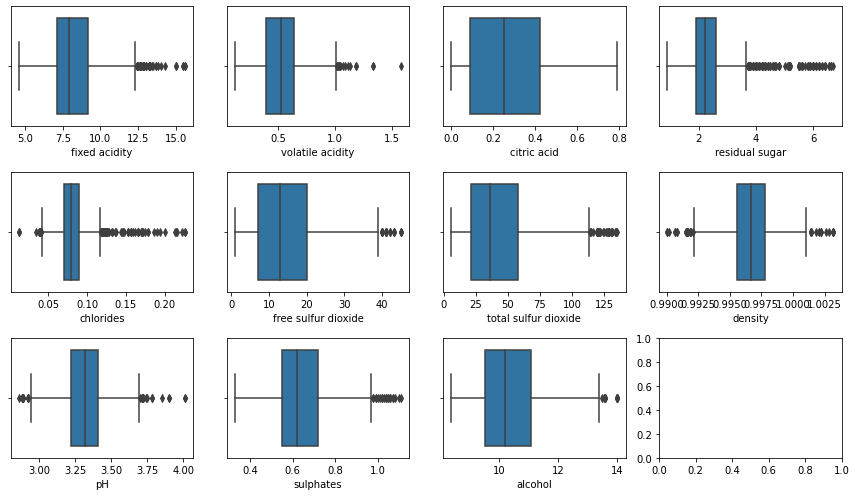

In [891]:
box_plots(wine_samples)

In [892]:
outlier_detection(wine_samples)

The shape before removing outliers is- (1480, 12)
The shape after removing outliers is- (1388, 12)


### After removing the outliers

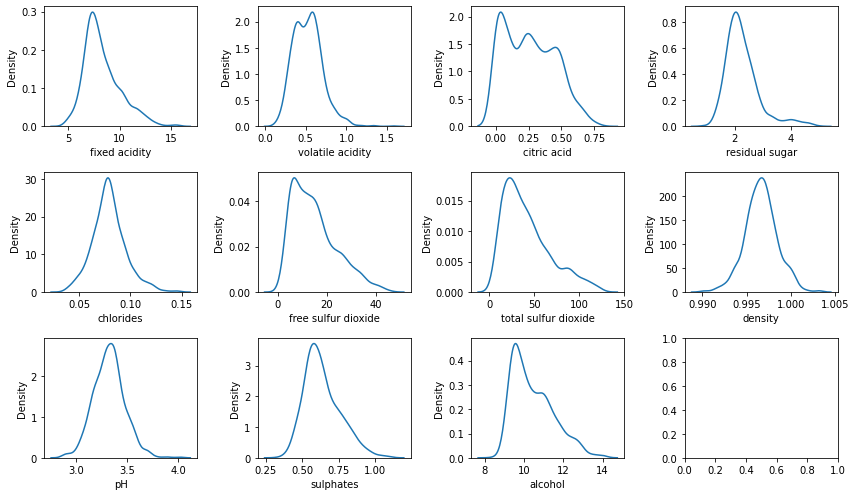

In [893]:
kde_plot_skew(wine_samples)

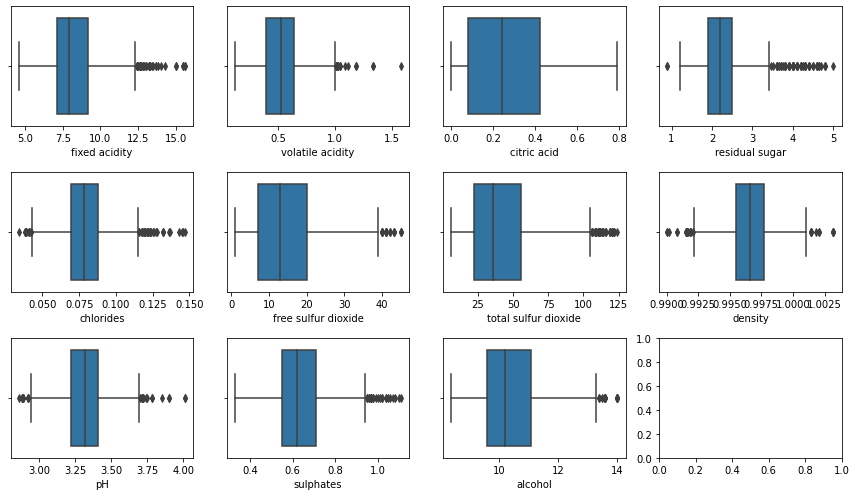

In [896]:
box_plots(wine_samples)

In [897]:
wine_samples.quality.value_counts()

good    766
bad     622
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

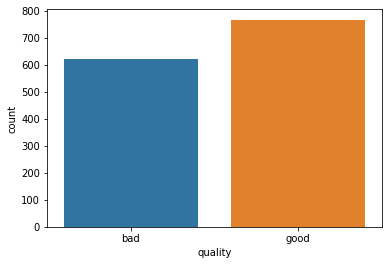

In [898]:
sns.countplot(wine_samples.quality)

- This looks alright and balanced, so we will continue with the sampe data without any resampling. 

## Encoding the target variable

In [35]:
lb_enc = LabelEncoder()
wine_samples.quality = lb_enc.fit_transform(wine_samples.quality)

In [36]:
wine_samples.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

## Separating the Independent and Dependent varaibles


In [37]:
X = wine_samples.drop(columns='quality', axis=1)

Y = wine_samples.quality

In [38]:
print(X.shape)
print(Y.shape)

(1480, 11)
(1480,)


## Splitting the data

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1110, 11)
(1110,)
(370, 11)
(370,)


## Standardization of feature Variables


In [40]:
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.transform(x_test)

## Building the Models

# 1. Logisitic Regression

In [41]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train_std, y_train)

LogisticRegression(random_state=0)

## Evaluation Metrics


In [42]:
y_train_pred_log_reg = log_reg.predict(x_train_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train, y_train_pred_log_reg)}")
y_test_pred_log_reg = log_reg.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_log_reg)}")

Train Accuracy - 0.7558558558558559
Test Accuracy - 0.7486486486486487


### ROC-Curve

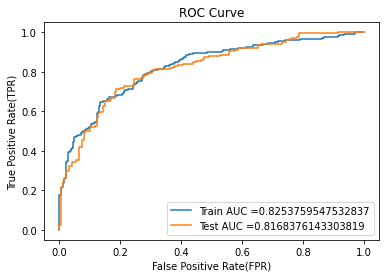

In [43]:
y_test_pred = log_reg.predict_proba(x_test_std)[:,1]
y_train_pred = log_reg.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

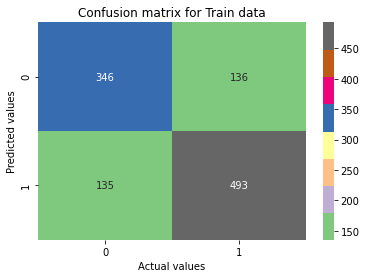

In [44]:
cmt = metrics.confusion_matrix(y_train, y_train_pred_log_reg)
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

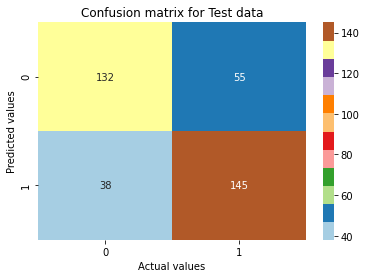

In [45]:

cmt = metrics.confusion_matrix(y_test, y_test_pred_log_reg)
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

## 2. Logistic Regression + GridSearchCV

In [46]:
grid={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("Best Hyper-parameters after GridSearchCv are - ",logreg_cv.best_params_)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best Hyper-parameters after GridSearchCv are -  {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}


In [47]:
logreg2=LogisticRegression(C=4.281332398719396,penalty="l2",solver='liblinear',random_state=0)
logreg2.fit(x_train_std,y_train)

LogisticRegression(C=4.281332398719396, random_state=0, solver='liblinear')

## Evaluation Metrics

In [48]:
y_train_pred_log_reg2 = logreg2.predict(x_train_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train, y_train_pred_log_reg2)}")
y_test_pred_log_reg2 = logreg2.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_log_reg2)}")

Train Accuracy - 0.7558558558558559
Test Accuracy - 0.7486486486486487


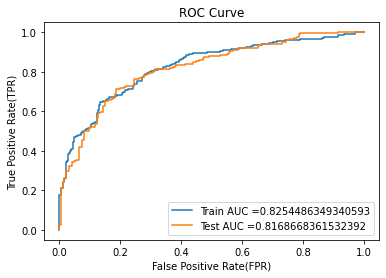

In [49]:
y_test_pred = logreg2.predict_proba(x_test_std)[:,1]
y_train_pred = logreg2.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

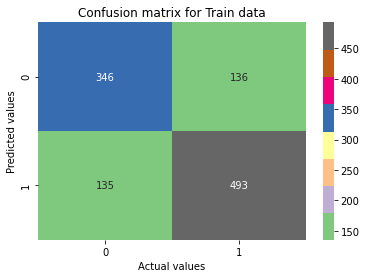

In [50]:
cmt = metrics.confusion_matrix(y_train, logreg2.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

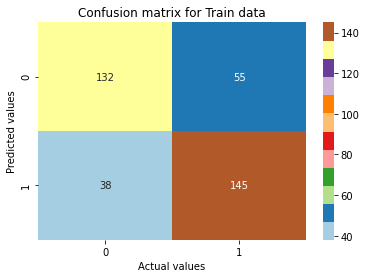

In [51]:
cmt = metrics.confusion_matrix(y_test, logreg2.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [52]:
print(metrics.classification_report(y_test, y_test_pred_log_reg2))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       187
           1       0.72      0.79      0.76       183

    accuracy                           0.75       370
   macro avg       0.75      0.75      0.75       370
weighted avg       0.75      0.75      0.75       370



## 3. K-NeighrestNeighbors(KNN)

In [53]:
knn = KNeighborsClassifier()
knn.fit(x_train_std, y_train)

KNeighborsClassifier()

## Evaluation Metrics


In [54]:
y_train_pred_knn = knn.predict(x_train_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train, y_train_pred_knn)}")
y_test_pred_knn = knn.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_knn)}")

Train Accuracy - 0.8162162162162162
Test Accuracy - 0.7432432432432432


### ROC-Curve

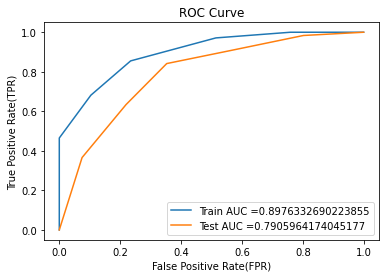

In [55]:
y_test_pred = knn.predict_proba(x_test_std)[:,1]
y_train_pred = knn.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

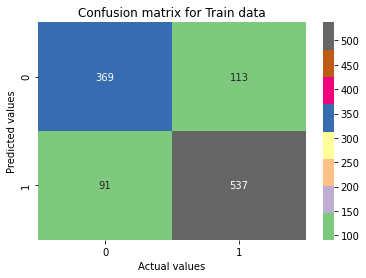

In [56]:
cmt = metrics.confusion_matrix(y_train, y_train_pred_knn)
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

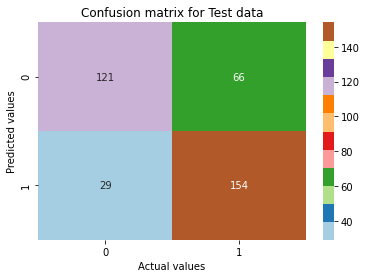

In [57]:
cmt = metrics.confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [58]:
print(metrics.classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       187
           1       0.70      0.84      0.76       183

    accuracy                           0.74       370
   macro avg       0.75      0.74      0.74       370
weighted avg       0.75      0.74      0.74       370



## 4.KNN with GridSearchCV


In [59]:
params = {
    'n_neighbors' :[3,5,7,9,11,13,15,17,19],
    'metric' : ['euclidean','manhattan']
}
kn = KNeighborsClassifier()
grid_knn = GridSearchCV(kn,params, cv=10)
grid_knn.fit(x_train_std, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [60]:
print('Best Hyper-parameters after GridSearchCV - ',grid_knn.best_params_)

Best Hyper-parameters after GridSearchCV -  {'metric': 'euclidean', 'n_neighbors': 17}


In [61]:
model_knn = KNeighborsClassifier(n_neighbors=17,metric='euclidean')
model_knn.fit(x_train_std, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

## Evaluation Metrics


In [62]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, model_knn.predict(x_train_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, model_knn.predict(x_test_std)))

Train Accuracy -  0.7693693693693694
Test Accuracy -  0.7162162162162162


### ROC-Curve

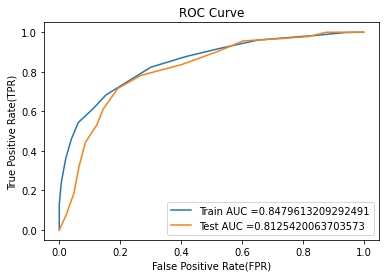

In [63]:
y_test_pred = model_knn.predict_proba(x_test_std)[:,1]
y_train_pred = model_knn.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

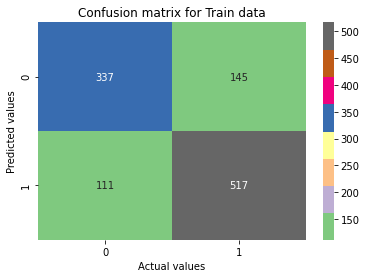

In [64]:
cmt = metrics.confusion_matrix(y_train, model_knn.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

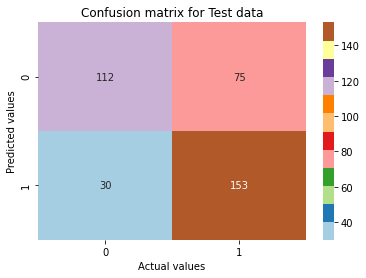

In [65]:
cmt = metrics.confusion_matrix(y_test, model_knn.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [66]:
print(metrics.classification_report(y_test, model_knn.predict(x_test_std)))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68       187
           1       0.67      0.84      0.74       183

    accuracy                           0.72       370
   macro avg       0.73      0.72      0.71       370
weighted avg       0.73      0.72      0.71       370



## 5. Decision Trees

In [67]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

## Evaluation  Metrics


In [68]:
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)
print('Train Accuracy - ',metrics.accuracy_score(y_train, y_train_pred_dt))
print('Test Accuracy - ',metrics.accuracy_score(y_test, y_test_pred_dt))

Train Accuracy -  1.0
Test Accuracy -  0.7432432432432432


### ROC-Curve

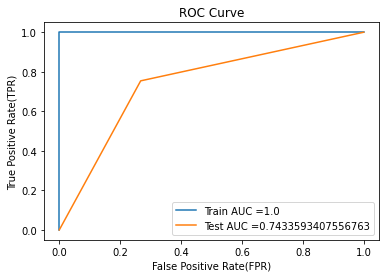

In [69]:
y_test_pred = dt.predict_proba(x_test)[:,1]
y_train_pred = dt.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


- This Decision Tree model is clearly overfitting.

## Confusion Matrix

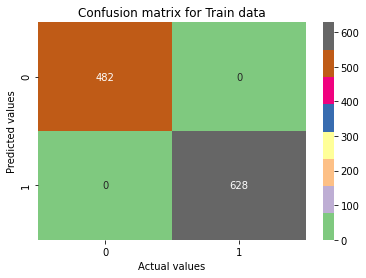

In [70]:
cmt = metrics.confusion_matrix(y_train, dt.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

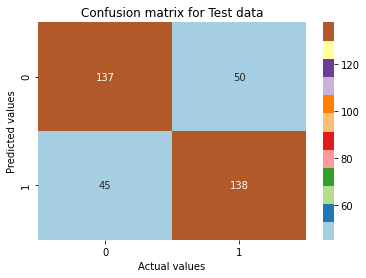

In [71]:
cmt = metrics.confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [72]:
print(metrics.classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       187
           1       0.73      0.75      0.74       183

    accuracy                           0.74       370
   macro avg       0.74      0.74      0.74       370
weighted avg       0.74      0.74      0.74       370



## 6. Decision Tree with GridSearchCV


In [73]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'criterion' : ['gini','entropy']
}

model_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv=10)
model_grid.fit(x_train, y_train)
print('Best parameters after GridSearchCV are - ',model_grid.best_params_)

Best parameters after GridSearchCV are -  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}


In [74]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_split=3, random_state=0)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=3, random_state=0)


## Evaluation Metrics


In [75]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, model_dt.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, model_dt.predict(x_test)))

Train Accuracy -  0.9594594594594594
Test Accuracy -  0.7162162162162162


### ROC-Curve


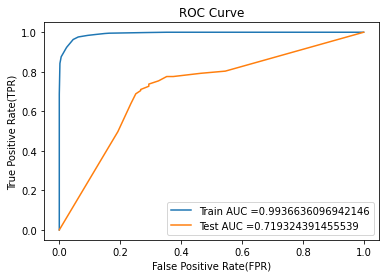

In [76]:
y_test_pred = model_dt.predict_proba(x_test)[:,1]
y_train_pred = model_dt.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


- Model is clearly overfitting, so tried different values and finalized the below values.

In [77]:
model_dt1 = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=3,random_state=1)
model_dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=1)

In [78]:
y_train_pred_dt = model_dt1.predict(x_train)
y_test_pred_dt = model_dt1.predict(x_test)
print('Train Accuracy - ',metrics.accuracy_score(y_train, y_train_pred_dt))
print('Test Accuracy - ',metrics.accuracy_score(y_test, y_test_pred_dt))

Train Accuracy -  0.7855855855855856
Test Accuracy -  0.7081081081081081


### ROC-Curve

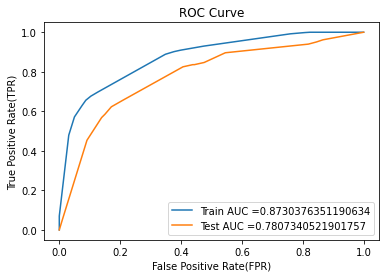

In [79]:
y_test_pred = model_dt1.predict_proba(x_test)[:,1]
y_train_pred = model_dt1.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

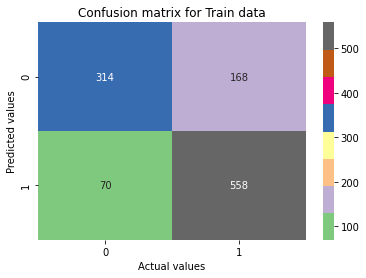

In [80]:
cmt = metrics.confusion_matrix(y_train, model_dt1.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

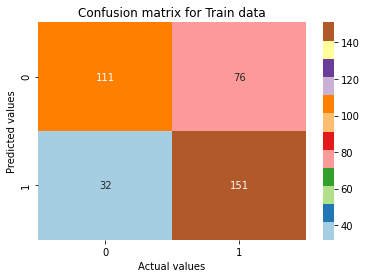

In [81]:
cmt = metrics.confusion_matrix(y_test, model_dt1.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [82]:
print(metrics.classification_report(y_test, model_dt1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       187
           1       0.67      0.83      0.74       183

    accuracy                           0.71       370
   macro avg       0.72      0.71      0.70       370
weighted avg       0.72      0.71      0.70       370



## 7. Random Forest

In [83]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

## Evaluation Metrics


In [84]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, rf.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, rf.predict(x_test)))

Train Accuracy -  1.0
Test Accuracy -  0.8081081081081081


### ROC-Curve

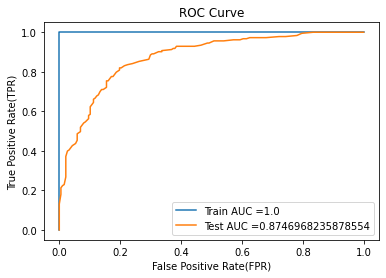

In [85]:
y_test_pred = rf.predict_proba(x_test)[:,1]
y_train_pred = rf.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

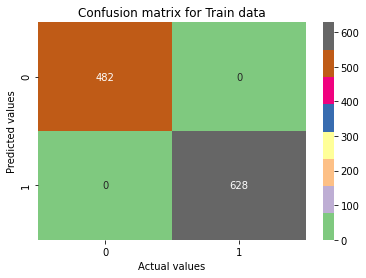

In [86]:
cmt = metrics.confusion_matrix(y_train, rf.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

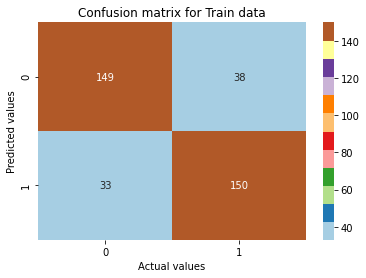

In [87]:
cmt = metrics.confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [88]:
print(metrics.classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       187
           1       0.80      0.82      0.81       183

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370



## 8. Random Forest with GridSearchCV

In [89]:
param_grid = { 
    'n_estimators': [100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=10 )
rf_grid.fit(x_train,y_train)
print('Best Hyper-parameters are - ',rf_grid.best_params_)

Best Hyper-parameters are -  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}


In [94]:
rf_model = RandomForestClassifier(criterion='gini',n_estimators=150,max_features='auto',max_depth=8, random_state=0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=150, random_state=0)

## Evaluation Metrics


In [96]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, rf_model.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, rf_model.predict(x_test)))

Train Accuracy -  0.9378378378378378
Test Accuracy -  0.7864864864864864


### ROC-Curve

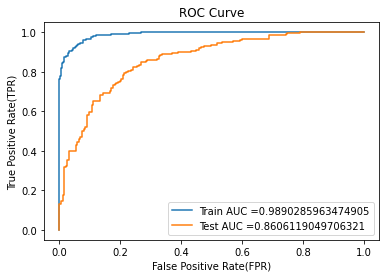

In [97]:
y_test_pred = rf_model.predict_proba(x_test)[:,1]
y_train_pred = rf_model.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


- Random Forest model is clearly overfitting.

## Confusion Matrix


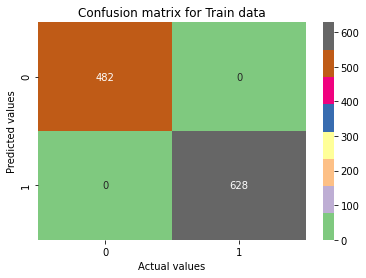

In [109]:
cmt = metrics.confusion_matrix(y_train, rf_model.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

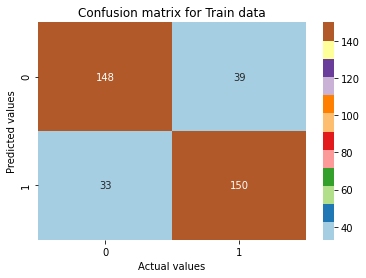

In [110]:
cmt = metrics.confusion_matrix(y_test, rf_model.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [111]:
print(metrics.classification_report(y_test, rf_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       187
           1       0.79      0.82      0.81       183

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370



## 9. SVM

In [112]:
svm = SVC(probability=True, random_state=1)
svm.fit(x_train_std, y_train)

SVC(probability=True, random_state=1)

## Evaluation Metrics


In [113]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, svm.predict(x_train_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, svm.predict(x_test_std)))

Train Accuracy -  0.8036036036036036
Test Accuracy -  0.772972972972973


### ROC-Curve


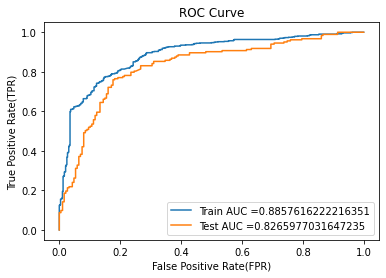

In [114]:
y_test_pred = svm.predict_proba(x_test_std)[:,1]
y_train_pred = svm.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix


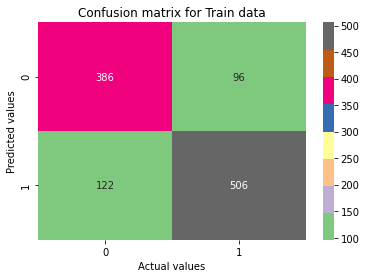

In [116]:
cmt = metrics.confusion_matrix(y_train, svm.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

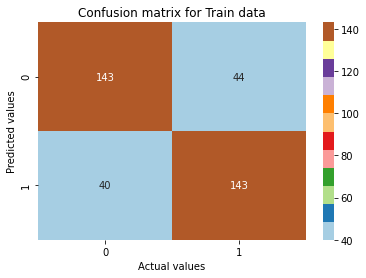

In [117]:
cmt = metrics.confusion_matrix(y_test, svm.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [118]:
print(metrics.classification_report(y_test, svm.predict(x_test_std)))


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       187
           1       0.76      0.78      0.77       183

    accuracy                           0.77       370
   macro avg       0.77      0.77      0.77       370
weighted avg       0.77      0.77      0.77       370



## 10. SVM with GridSearchCV

In [122]:
params = {
    'C':(np.arange(0.01,1,0.01)),
    'kernel':['linear','rbf','ploy'],
    'degree':[2,3,4,5],
    'gamma':[0.01,0.02,0.03,0.04,0.05]
}

svm_grid = GridSearchCV(SVC(), param_grid=params, cv=10)
svm_grid.fit(x_train_std, y_train)
print('Best Hyper-parameters are -',svm_grid.best_params_)

Best Hyper-parameters are - {'C': 0.6900000000000001, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}


In [123]:
svm_model = SVC(C=0.6900000000000001,kernel='rbf',degree=2,gamma=0.05,probability=True,random_state=0)
svm_model.fit(x_train_std,y_train)

SVC(C=0.6900000000000001, degree=2, gamma=0.05, probability=True,
    random_state=0)

## Evaluation Metrics

In [125]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, svm_model.predict(x_train_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, svm_model.predict(x_test_std)))

Train Accuracy -  0.7765765765765765
Test Accuracy -  0.7783783783783784


### ROC-Curve


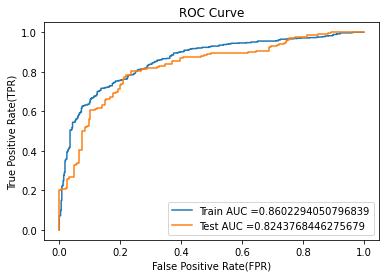

In [126]:
y_test_pred = svm_model.predict_proba(x_test_std)[:,1]
y_train_pred = svm_model.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


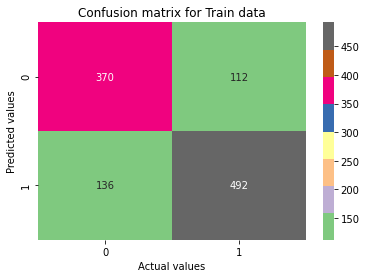

In [127]:
cmt = metrics.confusion_matrix(y_train, svm_model.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

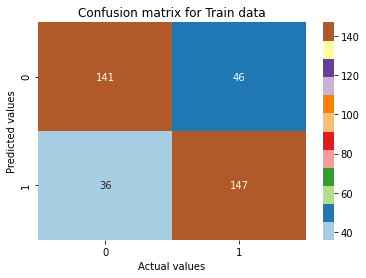

In [128]:
cmt = metrics.confusion_matrix(y_test, svm_model.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [129]:
print(metrics.classification_report(y_test, svm_model.predict(x_test_std)))


              precision    recall  f1-score   support

           0       0.80      0.75      0.77       187
           1       0.76      0.80      0.78       183

    accuracy                           0.78       370
   macro avg       0.78      0.78      0.78       370
weighted avg       0.78      0.78      0.78       370



## 11. AdaBoost

In [130]:
adb = AdaBoostClassifier(random_state=0)
adb.fit(x_train, y_train)

AdaBoostClassifier(random_state=0)

## Evaluation Metrics


In [131]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, adb.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, adb.predict(x_test)))


Train Accuracy -  0.7891891891891892
Test Accuracy -  0.7108108108108108


### ROC-Curve


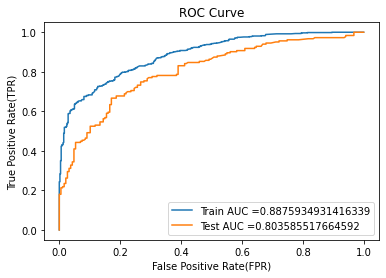

In [133]:
y_test_pred = adb.predict_proba(x_test)[:,1]
y_train_pred = adb.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


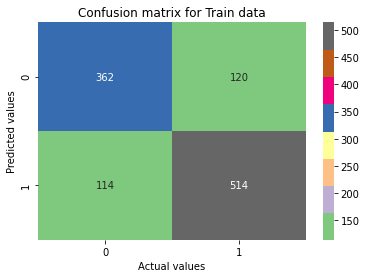

In [135]:
cmt = metrics.confusion_matrix(y_train, adb.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

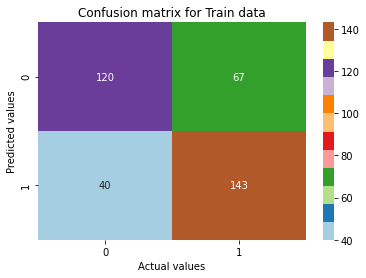

In [136]:
cmt = metrics.confusion_matrix(y_test, adb.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [137]:
print(metrics.classification_report(y_test, adb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       187
           1       0.68      0.78      0.73       183

    accuracy                           0.71       370
   macro avg       0.72      0.71      0.71       370
weighted avg       0.72      0.71      0.71       370



## 12. AdaBoost with GridSearchCV

In [138]:
param_grid = {
                'n_estimators' : [10,50,100,150,200,500],
                'learning_rate' : [0.01,0.05,0.1,0.3,1],
             }

ada_grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10)
ada_grid.fit(x_train, y_train)
print('Best Hyper-parameters after GridSearchCV are - ',ada_grid.best_params_)

Best Hyper-parameters after GridSearchCV are -  {'learning_rate': 0.1, 'n_estimators': 100}


In [139]:
ada_model = AdaBoostClassifier(n_estimators = 100 ,learning_rate=0.1, random_state=0)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)

## Evaluation Metrics


In [140]:
print('Train Accuracy - ',metrics.accuracy_score(y_train, ada_model.predict(x_train)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, ada_model.predict(x_test)))


Train Accuracy -  0.7792792792792793
Test Accuracy -  0.7324324324324324


### ROC-Curve


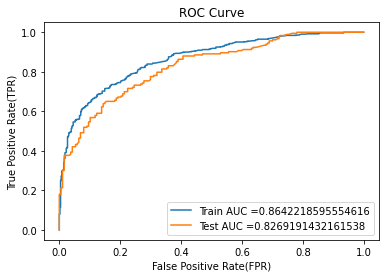

In [141]:
y_test_pred = ada_model.predict_proba(x_test)[:,1]
y_train_pred = ada_model.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


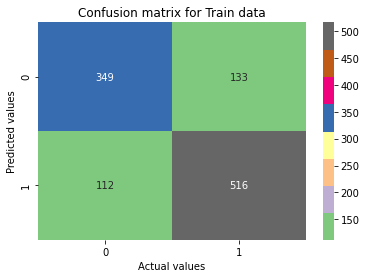

In [143]:
cmt = metrics.confusion_matrix(y_train, ada_model.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

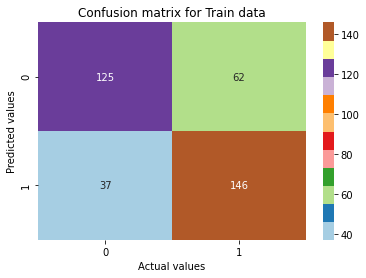

In [144]:
cmt = metrics.confusion_matrix(y_test, ada_model.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [145]:
print(metrics.classification_report(y_test, ada_model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.77      0.67      0.72       187
           1       0.70      0.80      0.75       183

    accuracy                           0.73       370
   macro avg       0.74      0.73      0.73       370
weighted avg       0.74      0.73      0.73       370



#  Consolidating all the results


In [146]:
table = PrettyTable(['S.no','Model','Train Accuracy', 'Test Accuracy'])

table.add_row(['1','Logistic Regression','75.59','74.86'])
table.add_row(['2','Logistic Regression+GridSearchCV','75.58','74.86'])
table.add_row(['3','K-NearestNeighbors','81.62','74.32'])
table.add_row(['4','K-NearestNeighbors+GridSearchCV','76.94','71.62'])
table.add_row(['5','Decision Tree','100','73.78'])
table.add_row(['6','Decision Tree+GridSearchCV','78.56','70.81'])
table.add_row(['7','Random Forest','100','81.08'])
table.add_row(['8','Random Forest+GridSearchCV','93.78','78.65'])
table.add_row(['9','SVM','80.36','77.29'])
table.add_row(['10','SVM+GridSearchCV','77.66','77.84'])
table.add_row(['11','AdaBoost','78.92','71.08'])
table.add_row(['12','AdaBoost+GridSearhCV','77.93','73.24'])
print(table)

+------+----------------------------------+----------------+---------------+
| S.no |              Model               | Train Accuracy | Test Accuracy |
+------+----------------------------------+----------------+---------------+
|  1   |       Logistic Regression        |     75.59      |     74.86     |
|  2   | Logistic Regression+GridSearchCV |     75.58      |     74.86     |
|  3   |        K-NearestNeighbors        |     81.62      |     74.32     |
|  4   | K-NearestNeighbors+GridSearchCV  |     76.94      |     71.62     |
|  5   |          Decision Tree           |      100       |     73.78     |
|  6   |    Decision Tree+GridSearchCV    |     78.56      |     70.81     |
|  7   |          Random Forest           |      100       |     81.08     |
|  8   |    Random Forest+GridSearchCV    |     93.78      |     78.65     |
|  9   |               SVM                |     80.36      |     77.29     |
|  10  |         SVM+GridSearchCV         |     77.66      |     77.84     |

- ### Amongst all we can see SVM performed well.

- Changing the criteria for dividing the quality into good and bad didnot help us much.
- I will continue the original criteria used and will handle the imbalanced data using resampling techniques.

## Handling the Imbalanced data

In [928]:
wine = pd.read_csv('QualityPrediction.csv')

### Dividing the quality into good and bad.

In [929]:
wine.quality = ['good' if x>=7 else 'bad' for x in wine.quality]

In [930]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad

In [931]:
wine.quality.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

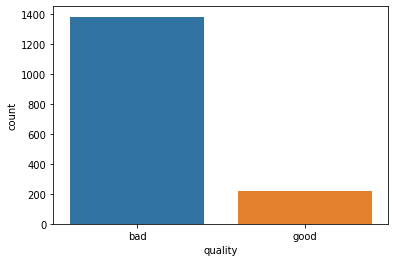

In [932]:
sns.countplot(wine.quality)

- This is a imbalanced data, so need to convert this into balanced data using sampling techniques.

## Encoding the target variable

In [933]:
lb_enc = LabelEncoder()
wine.quality = lb_enc.fit_transform(wine.quality)

In [934]:
wine.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Separating the Independent and Dependent varaibles

In [935]:
X = wine.drop(columns='quality', axis=1)

Y = wine.quality

## Splitting the data

In [936]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1199, 11)
(1199,)
(400, 11)
(400,)


## UpSampling Technique

In [937]:
X_train = pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)],axis=1)

In [938]:
bad_quality_train = X_train[X_train.quality == 0]
good_quality_train = X_train[X_train.quality == 1]

In [939]:
print(bad_quality_train.shape)
print(good_quality_train.shape)


(1027, 12)
(172, 12)


- Now we see data is imbalanced so we oversample the minority class.

In [940]:
good_upsampled_train = resample(good_quality_train,replace=True,n_samples=len(bad_quality_train),random_state=12)


In [941]:
print(good_upsampled_train.shape)


(1027, 12)


In [942]:
upsampled_train = pd.concat([bad_quality_train,good_upsampled_train])


In [943]:
upsampled_train.quality.value_counts()

1    1027
0    1027
Name: quality, dtype: int64

In [944]:
y_train_rs = upsampled_train.quality
x_train_rs = upsampled_train.drop('quality', axis=1)


In [945]:
print(x_train_rs.shape)
print(y_train_rs.shape)


(2054, 11)
(2054,)


##  Checking for Missing values

<AxesSubplot:>

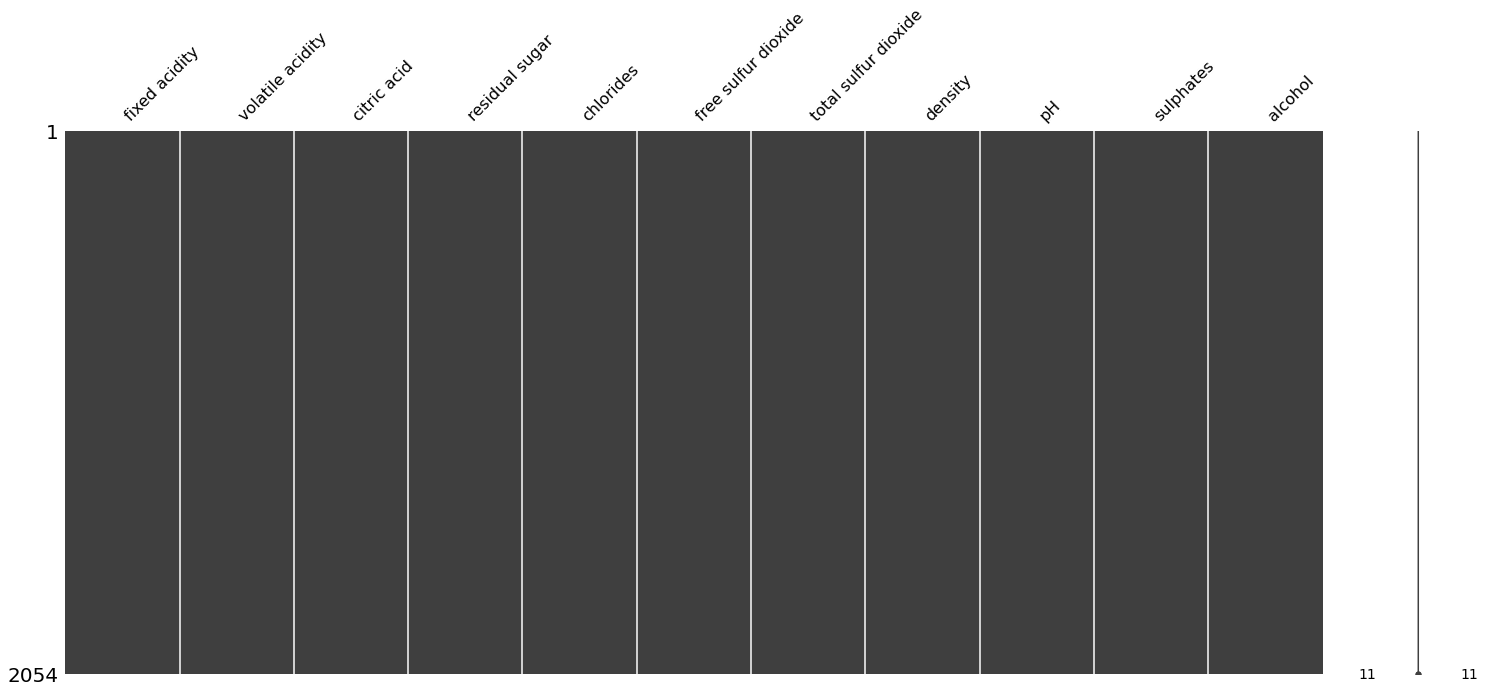

In [947]:
msn.matrix(x_train_rs)

In [948]:
x_train_rs.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

- No missing values after oversampling.

## Standardization of feature Variables

In [1407]:
scalestd = StandardScaler()
x_train_rs_std = scalestd.fit_transform(x_train_rs)
x_test_std = scalestd.transform(x_test)

## Building the Models

# 1. Logisitic Regression

In [1365]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train_rs_std, y_train_rs)

LogisticRegression(random_state=0)

## Evaluation Metrics


In [961]:
y_train_pred_log_reg = log_reg.predict(x_train_rs_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train_rs, y_train_pred_log_reg)}")
y_test_pred_log_reg = log_reg.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_log_reg)}")

Train Accuracy - 0.8018500486854917
Test Accuracy - 0.7375


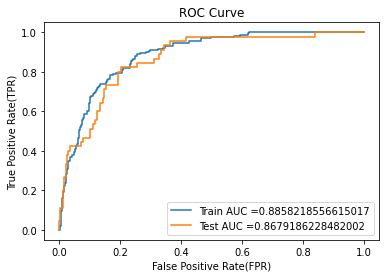

In [962]:
y_test_pred = log_reg.predict_proba(x_test_std)[:,1]
y_train_pred = log_reg.predict_proba(x_train_rs_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

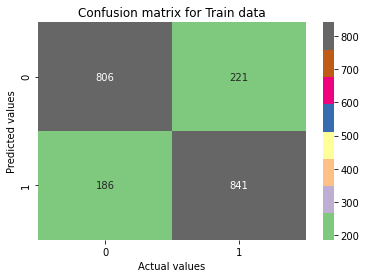

In [963]:
cmt = metrics.confusion_matrix(y_train_rs, y_train_pred_log_reg)
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

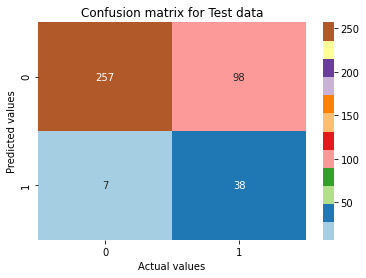

In [964]:
cmt = metrics.confusion_matrix(y_test, y_test_pred_log_reg)
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [965]:
print(metrics.classification_report(y_test, y_test_pred_log_reg))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       355
           1       0.28      0.84      0.42        45

    accuracy                           0.74       400
   macro avg       0.63      0.78      0.63       400
weighted avg       0.90      0.74      0.78       400



## 2. Logistic Regression + GridSearchCV


In [968]:
grid={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_rs_std,y_train_rs)

print("Best Hyper-parameters after GridSearchCv are - ",logreg_cv.best_params_)

Best Hyper-parameters after GridSearchCv are -  {'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}


In [969]:
logreg2=LogisticRegression(C=0.03359818286283781,penalty="l1",solver='liblinear',random_state=0)
logreg2.fit(x_train_rs_std,y_train_rs)

LogisticRegression(C=0.03359818286283781, penalty='l1', random_state=0,
                   solver='liblinear')

## Evaluation Metrics

In [971]:
y_train_pred_log_reg2 = logreg2.predict(x_train_rs_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train_rs, y_train_pred_log_reg2)}")
y_test_pred_log_reg2 = logreg2.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_log_reg2)}")

Train Accuracy - 0.8062317429406037
Test Accuracy - 0.74


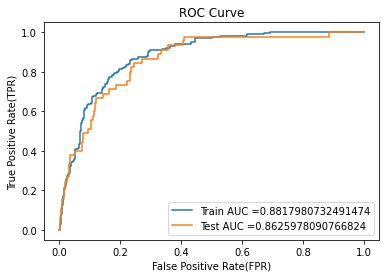

In [972]:
y_test_pred = logreg2.predict_proba(x_test_std)[:,1]
y_train_pred = logreg2.predict_proba(x_train_rs_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


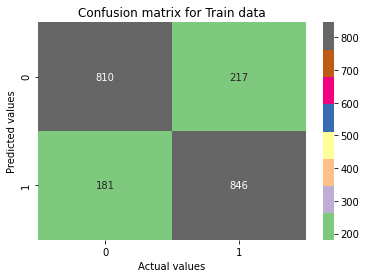

In [973]:
cmt = metrics.confusion_matrix(y_train_rs, logreg2.predict(x_train_rs_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

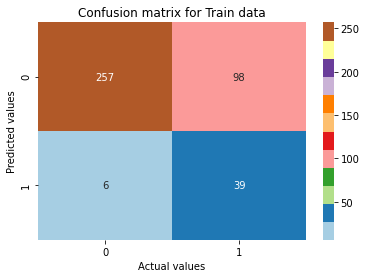

In [974]:
cmt = metrics.confusion_matrix(y_test, logreg2.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [975]:
print(metrics.classification_report(y_test, y_test_pred_log_reg2))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       355
           1       0.28      0.87      0.43        45

    accuracy                           0.74       400
   macro avg       0.63      0.80      0.63       400
weighted avg       0.90      0.74      0.79       400



## 3. K-NearestNeighbors(KNN)

In [980]:
knn = KNeighborsClassifier()
knn.fit(x_train_rs_std, y_train_rs)

KNeighborsClassifier()

## Evaluation Metrics


In [984]:
y_train_pred_knn = knn.predict(x_train_rs_std)
print(f"Train Accuracy - {metrics.accuracy_score(y_train_rs, y_train_pred_knn)}")
y_test_pred_knn = knn.predict(x_test_std)
print(f"Test Accuracy - {metrics.accuracy_score(y_test, y_test_pred_knn)}")

Train Accuracy - 0.9225900681596884
Test Accuracy - 0.7975


### ROC-Curve

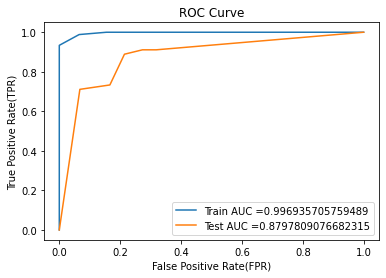

In [985]:
y_test_pred = knn.predict_proba(x_test_std)[:,1]
y_train_pred = knn.predict_proba(x_train_rs_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

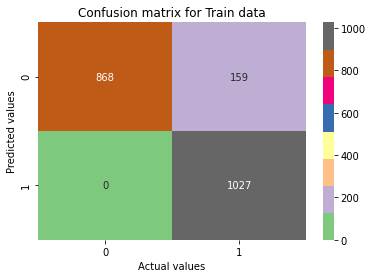

In [986]:
cmt = metrics.confusion_matrix(y_train_rs, y_train_pred_knn)
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

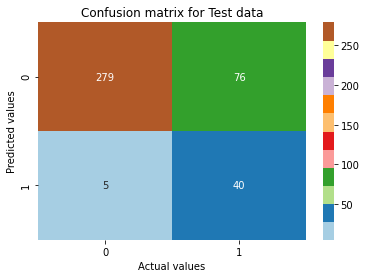

In [987]:
cmt = metrics.confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [988]:
print(metrics.classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       355
           1       0.34      0.89      0.50        45

    accuracy                           0.80       400
   macro avg       0.66      0.84      0.69       400
weighted avg       0.91      0.80      0.83       400



## 4.KNN with GridSearchCV

In [1046]:
params = {
    'n_neighbors' :[3,5,7,9,11,13,15],
    'metric' : ['euclidean','manhattan']
}
kn = KNeighborsClassifier()
grid_knn = GridSearchCV(kn,params, cv=10)
grid_knn.fit(x_train_rs_std, y_train_rs)
print('Best Hyper-parameters after GridSearchCV - ',grid_knn.best_params_)

Best Hyper-parameters after GridSearchCV -  {'metric': 'euclidean', 'n_neighbors': 3}


- The above hyper-parameters are also overfitting so checking manually.

In [1047]:
k_range = range(31,100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_rs_std, y_train_rs)
    y_pred = knn.predict(x_test_std)
    scores.append(metrics.accuracy_score(y_test,y_pred))

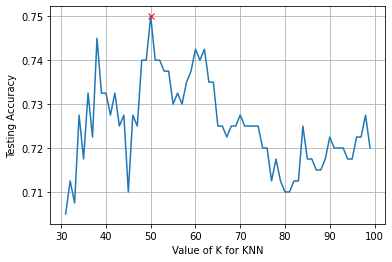

In [1048]:

plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.grid()
plt.ylabel('Testing Accuracy')
plt.plot(k_range[scores.index(max(scores))],max(scores),'rx')

In [1049]:
model_knn = KNeighborsClassifier(n_neighbors=50,metric='euclidean')
model_knn.fit(x_train_rs_std, y_train_rs)

KNeighborsClassifier(metric='euclidean', n_neighbors=50)

## Evaluation Metrics


In [1050]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, model_knn.predict(x_train_rs_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, model_knn.predict(x_test_std)))

Train Accuracy -  0.8091528724440117
Test Accuracy -  0.75


### ROC-Curve

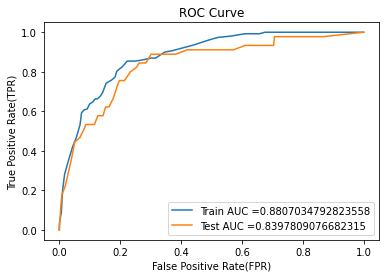

In [1051]:
y_test_pred = model_knn.predict_proba(x_test_std)[:,1]
y_train_pred = model_knn.predict_proba(x_train_rs_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


  
 ## Confusion Matrix

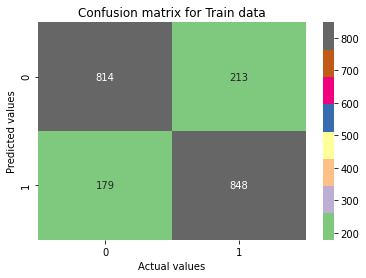

In [1053]:
cmt = metrics.confusion_matrix(y_train_rs, model_knn.predict(x_train_rs_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

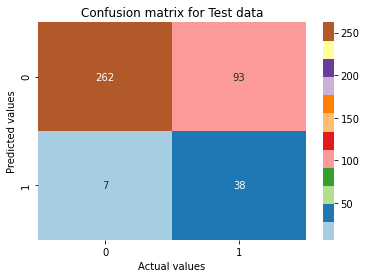

In [1054]:
cmt = metrics.confusion_matrix(y_test, model_knn.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [1055]:
print(metrics.classification_report(y_test, model_knn.predict(x_test_std)))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       355
           1       0.29      0.84      0.43        45

    accuracy                           0.75       400
   macro avg       0.63      0.79      0.64       400
weighted avg       0.90      0.75      0.79       400



## 5. Decision Trees

In [1056]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

## Evaluation  Metrics

In [1057]:
y_train_pred_dt = dt.predict(x_train_rs)
y_test_pred_dt = dt.predict(x_test)
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, y_train_pred_dt))
print('Test Accuracy - ',metrics.accuracy_score(y_test, y_test_pred_dt))

Train Accuracy -  1.0
Test Accuracy -  0.8875


### ROC-Curve

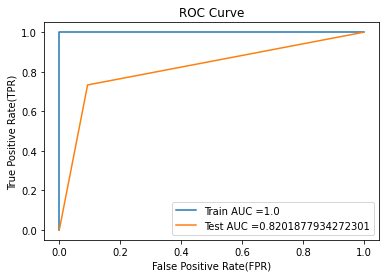

In [1058]:
y_test_pred = dt.predict_proba(x_test)[:,1]
y_train_pred = dt.predict_proba(x_train_rs)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

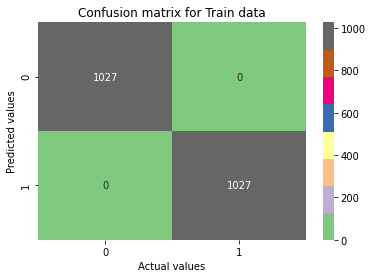

In [1059]:
cmt = metrics.confusion_matrix(y_train_rs, dt.predict(x_train_rs))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

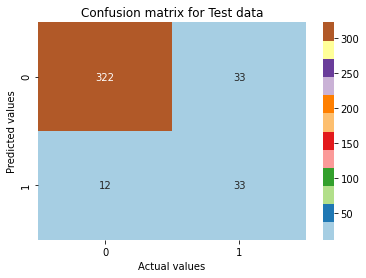

In [1060]:
cmt = metrics.confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

In [1061]:
print(metrics.classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       355
           1       0.50      0.73      0.59        45

    accuracy                           0.89       400
   macro avg       0.73      0.82      0.76       400
weighted avg       0.91      0.89      0.90       400



## 6. Decision Tree with GridSearchCV

In [1149]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'max_features' : [1,2,3,4,5,6,7,8,9,10,11],
    'criterion' : ['gini','entropy']
}

model_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv=10)
model_grid.fit(x_train_rs, y_train_rs)
print('Best parameters after GridSearchCV are - ',model_grid.best_params_)

Best parameters after GridSearchCV are -  {'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'min_samples_split': 3}


In [1171]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=7, min_samples_split=5,max_features=4, random_state=0)

model_dt.fit(x_train_rs, y_train_rs)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=4,
                       min_samples_split=5, random_state=0)

## Evaluation Metrics

In [1172]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, model_dt.predict(x_train_rs)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, model_dt.predict(x_test)))

Train Accuracy -  0.9065238558909445
Test Accuracy -  0.7825


### ROC-Curve

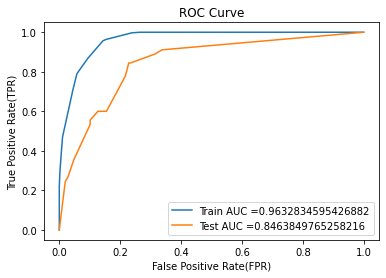

In [1173]:
y_test_pred = model_dt.predict_proba(x_test)[:,1]
y_train_pred = model_dt.predict_proba(x_train_rs)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix


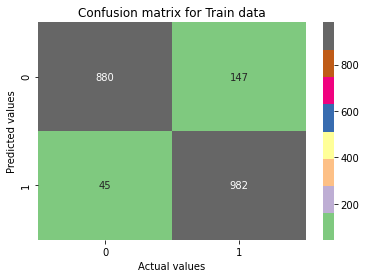

In [1175]:
cmt = metrics.confusion_matrix(y_train_rs, model_dt.predict(x_train_rs))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

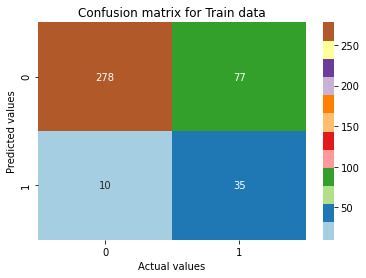

In [1176]:
cmt = metrics.confusion_matrix(y_test, model_dt.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1177]:
print(metrics.classification_report(y_test, model_dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       355
           1       0.31      0.78      0.45        45

    accuracy                           0.78       400
   macro avg       0.64      0.78      0.66       400
weighted avg       0.89      0.78      0.82       400



## 7. Random Forest

In [1178]:
rf = RandomForestClassifier()
rf.fit(x_train_rs,y_train_rs)

RandomForestClassifier()

## Evaluation Metrics

In [1180]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, rf.predict(x_train_rs)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, rf.predict(x_test)))

Train Accuracy -  1.0
Test Accuracy -  0.91


### ROC-Curve

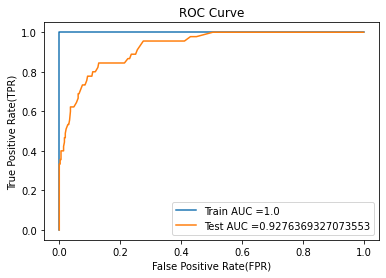

In [1181]:
y_test_pred = rf.predict_proba(x_test)[:,1]
y_train_pred = rf.predict_proba(x_train_rs)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix

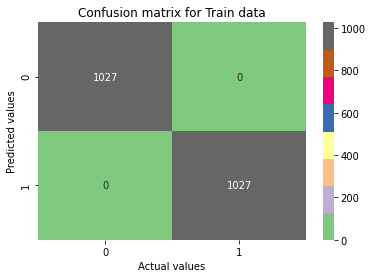

In [1182]:
cmt = metrics.confusion_matrix(y_train_rs, rf.predict(x_train_rs))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

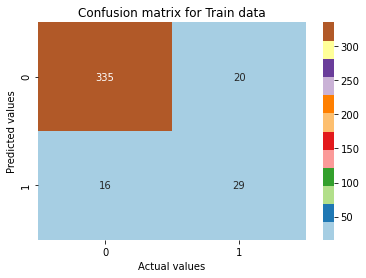

In [1183]:
cmt = metrics.confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1184]:
print(metrics.classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       355
           1       0.59      0.64      0.62        45

    accuracy                           0.91       400
   macro avg       0.77      0.79      0.78       400
weighted avg       0.91      0.91      0.91       400



## 8. Random Forest with GridSearchCV


In [1185]:
param_grid = { 
    'n_estimators': [100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=10 )
rf_grid.fit(x_train_rs,y_train_rs)
print('Best Hyper-parameters are - ',rf_grid.best_params_)

Best Hyper-parameters are -  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [1220]:
rf_model = RandomForestClassifier(criterion='gini',n_estimators=500,max_features='log2',max_depth=7, random_state=0)
rf_model.fit(x_train_rs, y_train_rs)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=500,
                       random_state=0)

## Evaluation Metrics


In [1221]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, rf_model.predict(x_train_rs)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, rf_model.predict(x_test)))

Train Accuracy -  0.9595910418695229
Test Accuracy -  0.86


   ### ROC-Curve

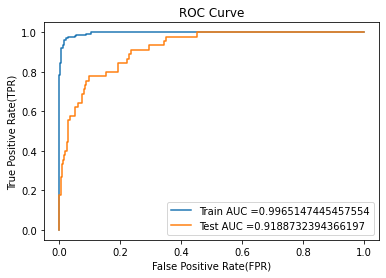

In [1222]:
y_test_pred = rf_model.predict_proba(x_test)[:,1]
y_train_pred = rf_model.predict_proba(x_train_rs)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix


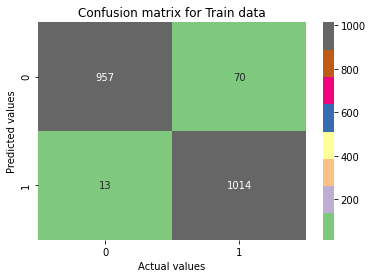

In [1223]:
cmt = metrics.confusion_matrix(y_train_rs, rf_model.predict(x_train_rs))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

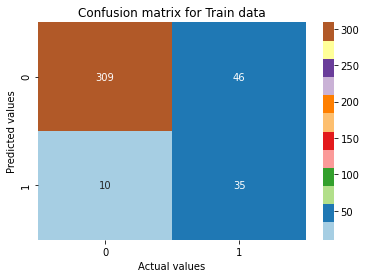

In [1224]:
cmt = metrics.confusion_matrix(y_test, rf_model.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1225]:
print(metrics.classification_report(y_test, rf_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       355
           1       0.43      0.78      0.56        45

    accuracy                           0.86       400
   macro avg       0.70      0.82      0.74       400
weighted avg       0.91      0.86      0.88       400



## 9. SVM

In [1227]:
svm = SVC(probability=True, random_state=1)
svm.fit(x_train_rs_std, y_train_rs)

SVC(probability=True, random_state=1)

## Evaluation Metrics


In [1228]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, svm.predict(x_train_rs_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, svm.predict(x_test_std)))

Train Accuracy -  0.882667964946446
Test Accuracy -  0.7925


### ROC-Curve


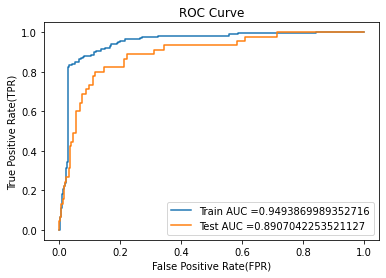

In [1230]:
y_test_pred = svm.predict_proba(x_test_std)[:,1]
y_train_pred = svm.predict_proba(x_train_rs_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Confusion Matrix


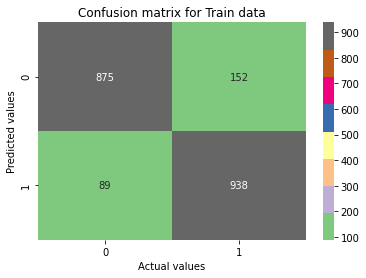

In [1231]:
cmt = metrics.confusion_matrix(y_train_rs, svm.predict(x_train_rs_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

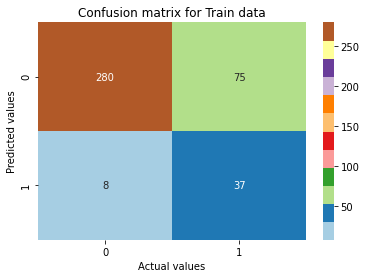

In [1232]:
cmt = metrics.confusion_matrix(y_test, svm.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1233]:
print(metrics.classification_report(y_test, svm.predict(x_test_std)))


              precision    recall  f1-score   support

           0       0.97      0.79      0.87       355
           1       0.33      0.82      0.47        45

    accuracy                           0.79       400
   macro avg       0.65      0.81      0.67       400
weighted avg       0.90      0.79      0.83       400



## 10. SVM with GridSearchCV

In [1234]:
params = {
    'C':(np.arange(0.01,1,0.01)),
    'kernel':['linear','rbf','ploy'],
    'degree':[2,3,4,5],
    'gamma':[0.01,0.02,0.03,0.04,0.05]
}

svm_grid = GridSearchCV(SVC(), param_grid=params, cv=10)
svm_grid.fit(x_train_rs_std, y_train_rs)
print('Best Hyper-parameters are -',svm_grid.best_params_)

Best Hyper-parameters are - {'C': 0.9500000000000001, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}


In [1257]:
svm_model = SVC(C=10,kernel='rbf',degree=2,gamma=0.05,probability=True,random_state=0)
svm_model.fit(x_train_rs_std,y_train_rs)

SVC(C=10, degree=2, gamma=0.05, probability=True, random_state=0)

In [1399]:
params = {
    'C':(np.arange(0.01,1,0.01)),
    'kernel':['linear','rbf','ploy'],
    'degree':[2,3,4,5],
    'gamma':[0.01,0.02,0.03,0.04,0.05]
}

svm_grid = GridSearchCV(SVC(), param_grid=params, cv=10)
svm_grid.fit(x_train_rs_norm, y_train_rs)
print('Best Hyper-parameters are -',svm_grid.best_params_)

Best Hyper-parameters are - {'C': 0.9500000000000001, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}


## Evaluation Metrics

In [1258]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, svm_model.predict(x_train_rs_std)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, svm_model.predict(x_test_std)))

Train Accuracy -  0.9206426484907497
Test Accuracy -  0.83


### ROC-Curve

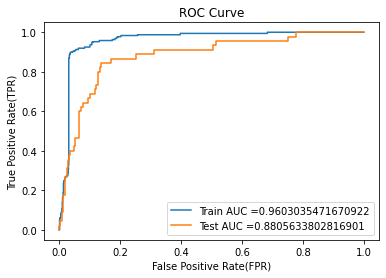

In [1260]:
y_test_pred = svm_model.predict_proba(x_test_std)[:,1]
y_train_pred = svm_model.predict_proba(x_train_rs_std)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix
     

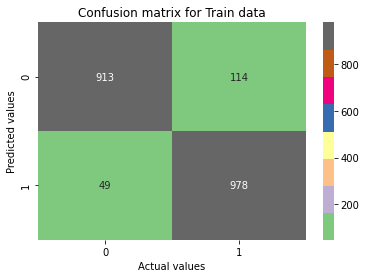

In [1261]:
cmt = metrics.confusion_matrix(y_train_rs, svm_model.predict(x_train_rs_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

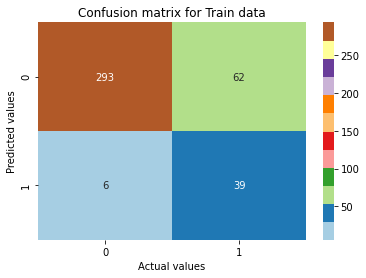

In [1262]:
cmt = metrics.confusion_matrix(y_test, svm_model.predict(x_test_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1263]:
print(metrics.classification_report(y_test, svm_model.predict(x_test_std)))


              precision    recall  f1-score   support

           0       0.98      0.83      0.90       355
           1       0.39      0.87      0.53        45

    accuracy                           0.83       400
   macro avg       0.68      0.85      0.72       400
weighted avg       0.91      0.83      0.86       400



## 11. AdaBoost


In [1264]:
adb = AdaBoostClassifier(random_state=0)
adb.fit(x_train_rs, y_train_rs)

AdaBoostClassifier(random_state=0)

## Evaluation Metrics


In [1266]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, adb.predict(x_train_rs)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, adb.predict(x_test)))


Train Accuracy -  0.8821811100292113
Test Accuracy -  0.81


### ROC-Curve


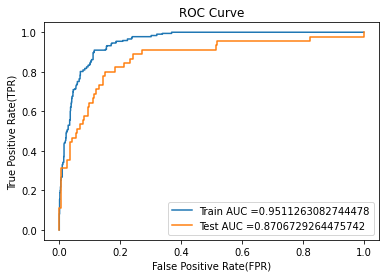

In [1267]:
y_test_pred = adb.predict_proba(x_test)[:,1]
y_train_pred = adb.predict_proba(x_train_rs)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


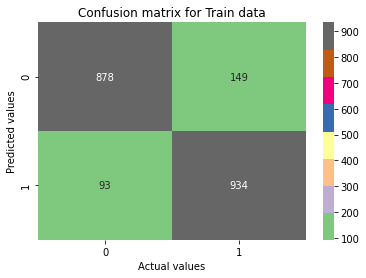

In [1270]:
cmt = metrics.confusion_matrix(y_train_rs ,adb.predict(x_train_rs))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

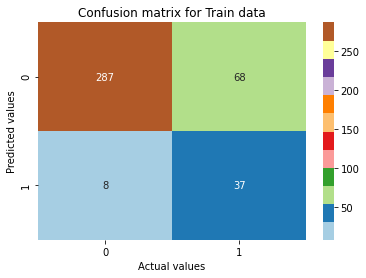

In [1271]:
cmt = metrics.confusion_matrix(y_test, adb.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1272]:
print(metrics.classification_report(y_test, adb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       355
           1       0.35      0.82      0.49        45

    accuracy                           0.81       400
   macro avg       0.66      0.82      0.69       400
weighted avg       0.90      0.81      0.84       400



## 12. AdaBoost with GridSearchCV

In [1273]:
param_grid = {
                'n_estimators' : [10,50,100,150,200,500],
                'learning_rate' : [0.01,0.05,0.1,0.3,1],
             }

ada_grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10)
ada_grid.fit(x_train_rs, y_train_rs)
print('Best Hyper-parameters after GridSearchCV are - ',ada_grid.best_params_)

Best Hyper-parameters after GridSearchCV are -  {'learning_rate': 1, 'n_estimators': 500}


In [1277]:
ada_model = AdaBoostClassifier(n_estimators = 300 ,learning_rate=1, random_state=0)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=0)

## Evaluation Metrics


In [1278]:
print('Train Accuracy - ',metrics.accuracy_score(y_train_rs, ada_model.predict(x_train_rs)))
print('Test Accuracy - ',metrics.accuracy_score(y_test, ada_model.predict(x_test)))


Train Accuracy -  0.9123661148977604
Test Accuracy -  0.885


### ROC-Curve


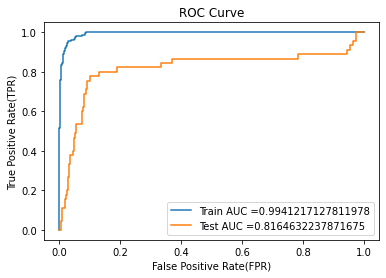

In [1279]:
y_test_pred = ada_model.predict_proba(x_test)[:,1]
y_train_pred = ada_model.predict_proba(x_train_rs)[:,1]

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_rs, y_train_pred)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(metrics.auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(metrics.auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Confusion Matrix


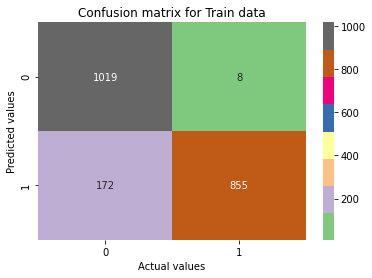

In [1280]:
cmt = metrics.confusion_matrix(y_train_rs, ada_model.predict(x_train_rs))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

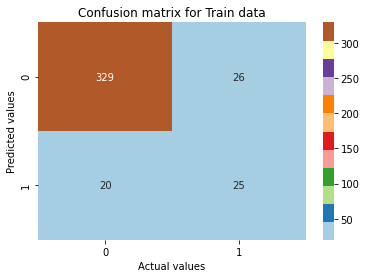

In [1281]:
cmt = metrics.confusion_matrix(y_test, ada_model.predict(x_test))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Paired')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

In [1282]:
print(metrics.classification_report(y_test, ada_model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       355
           1       0.49      0.56      0.52        45

    accuracy                           0.89       400
   macro avg       0.72      0.74      0.73       400
weighted avg       0.89      0.89      0.89       400



#  Consolidating all the results


In [1283]:
table = PrettyTable(['S.no','Model','Train Accuracy', 'Test Accuracy'])

table.add_row(['1','Logistic Regression','80.19','73.75'])
table.add_row(['2','Logistic Regression+GridSearchCV','80.62','74.00'])
table.add_row(['3','K-NearestNeighbors','92.26','79.75'])
table.add_row(['4','K-NearestNeighbors+GridSearchCV','80.92','75.00'])
table.add_row(['5','Decision Tree','100','88.75'])
table.add_row(['6','Decision Tree+GridSearchCV','90.65','78.25'])
table.add_row(['7','Random Forest','100','91.00'])
table.add_row(['8','Random Forest+GridSearchCV','95.96','86.00'])
table.add_row(['9','SVM','88.27','79.25'])
table.add_row(['10','SVM+GridSearchCV','92.06','83.00'])
table.add_row(['11','AdaBoost','88.28','81.00'])
table.add_row(['12','AdaBoost+GridSearhCV','91.24','88.50'])
print(table)

+------+----------------------------------+----------------+---------------+
| S.no |              Model               | Train Accuracy | Test Accuracy |
+------+----------------------------------+----------------+---------------+
|  1   |       Logistic Regression        |     80.19      |     73.75     |
|  2   | Logistic Regression+GridSearchCV |     80.62      |     74.00     |
|  3   |        K-NearestNeighbors        |     92.26      |     79.75     |
|  4   | K-NearestNeighbors+GridSearchCV  |     80.92      |     75.00     |
|  5   |          Decision Tree           |      100       |     88.75     |
|  6   |    Decision Tree+GridSearchCV    |     90.65      |     78.25     |
|  7   |          Random Forest           |      100       |     91.00     |
|  8   |    Random Forest+GridSearchCV    |     95.96      |     86.00     |
|  9   |               SVM                |     88.27      |     79.25     |
|  10  |         SVM+GridSearchCV         |     92.06      |     83.00     |

- ### Amongst all the models above, AdaBoost performed better.

In [49]:
from sklearn.model_selection import cross_val_score

In [51]:
x_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1280            7.1              0.46         0.20             1.9      0.077   
673             8.2              0.73         0.21             1.7      0.074   
641             9.5              0.59         0.44             2.3      0.071   
1135            8.0              0.25         0.43             1.7      0.067   
1019            7.0              0.50         0.14             1.8      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1280                 28.0                  54.0  0.99560  3.37       0.64   
673                   5.0                  13.0  0.99680  3.20       0.52   
641                  21.0                  68.0  0.99920  3.46       0.63   
1135                 22.0                  50.0  0.99460  3.38       0.60   
1019                 10.0                  23.0  0.99636  3.53       0.61   

      alcohol  
1280     10.4  
673       9.5  
641       9.5  
1135     11.9  
1019     10.4

In [ ]:
k_range = range(31,100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std, y_train)
    y_pred = knn.predict(x_test_std)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(figsize=(10,6))
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.grid()
plt.ylabel('Testing Accuracy')
plt.plot(k_range[scores.index(max(scores))],max(scores),'rx')

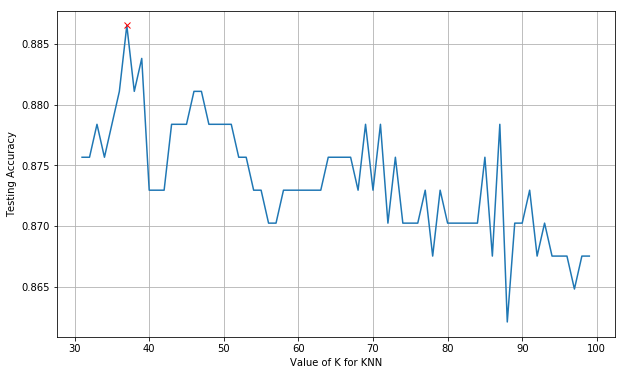

In [53]:
k_range = range(31,100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std, y_train)
    y_pred = knn.predict(x_test_std)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(figsize=(10,6))
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.grid()
plt.ylabel('Testing Accuracy')
plt.plot(k_range[scores.index(max(scores))],max(scores),'rx')

In [44]:
print(x_train_std.shape)
print(x_test_std.shape)
print(y_train.shape)
print(y_test.shape)

(1110, 11)
(370, 11)
(1110,)
(370,)
